In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df=pd.read_csv("Documents/titanic data.csv")

In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Detecting Missing Values

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [130]:
df["Age"].isnull().sum()

177

### 177 missing values are there in age attribute

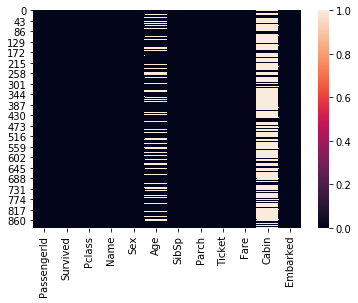

In [131]:
sns.heatmap(df.isnull())

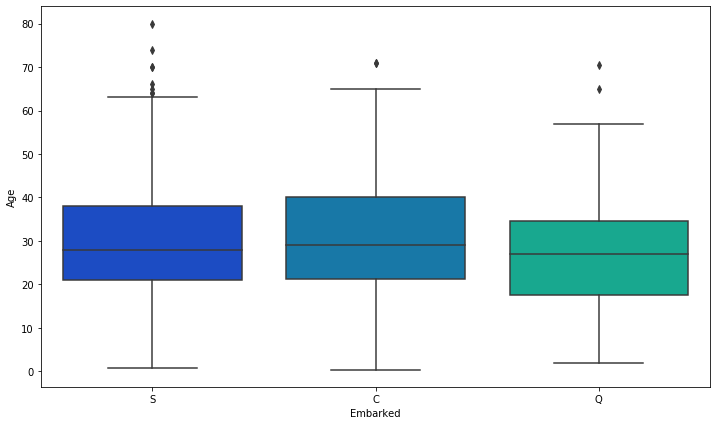

In [132]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Embarked",y="Age",data=df,palette="winter")


##Imputing Missing Values

In [133]:
mean_ages=df.groupby("Embarked")["Age"].mean()
mean_ages.head()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

In [134]:
def impute_age(cols):
    Age=cols[0]
    Embarked=cols[1]
    if(pd.isnull(Age)):
        return 29.445397
    else:
        return Age
    

In [135]:
df["Age"]=df[["Age","Embarked"]].apply(impute_age,axis=1)

In [136]:
df["Age"].isnull().sum()

0

In [137]:
df.drop("Cabin",axis=1,inplace=True)

In [138]:
df.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [139]:
common_value="S"
df["Embarked"]=df["Embarked"].fillna(common_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### All the missing values are assigned to the most likely port, which is Southampton

##Exploring and Visualizing Data

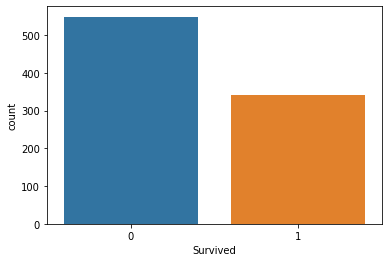

In [140]:
sns.countplot(x="Survived",data=df)

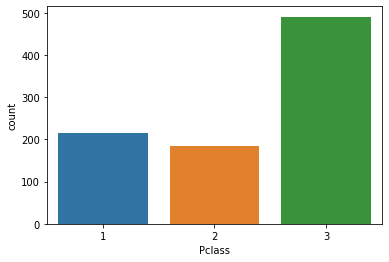

In [141]:
sns.countplot(x="Pclass",data=df)

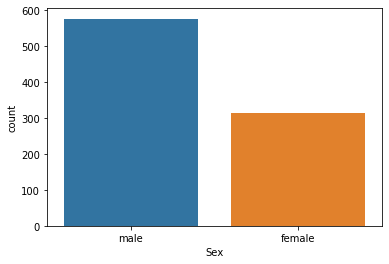

In [142]:
sns.countplot(x="Sex",data=df)

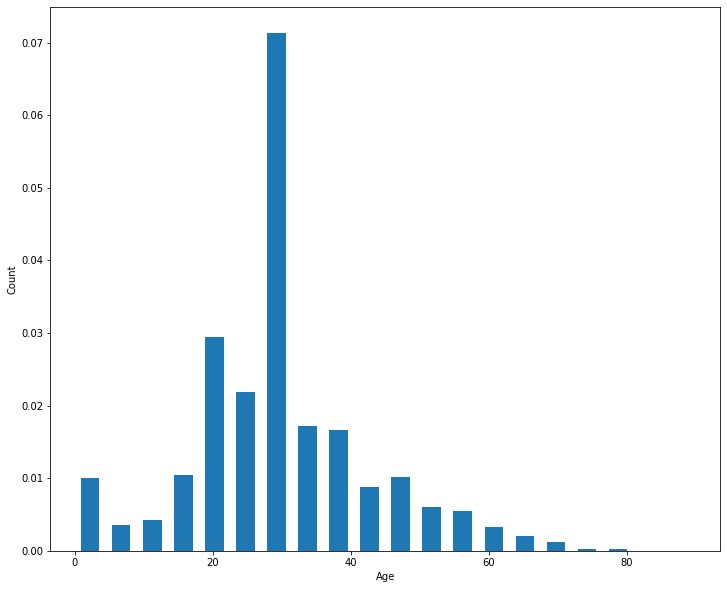

In [143]:
#Plot histogram of different ages
plt.figure(figsize=(12,10))
plt.hist(df["Age"],bins=20,range=(0,90),density=True,rwidth=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


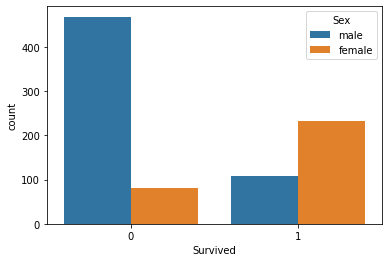

In [144]:
## Stacked barplot's  to find out 
 ##-which gender is more likely to perish during shipwrecks
 
sns.countplot(x="Survived",hue="Sex",data=df)

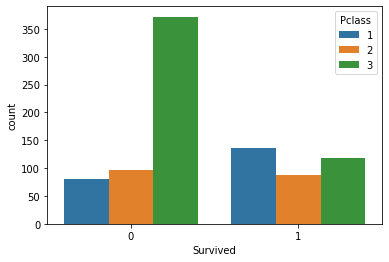

In [145]:
## Stacked barplot's  to find out 
##-Passenger survival by class
sns.countplot(x="Survived",hue="Pclass",data=df)

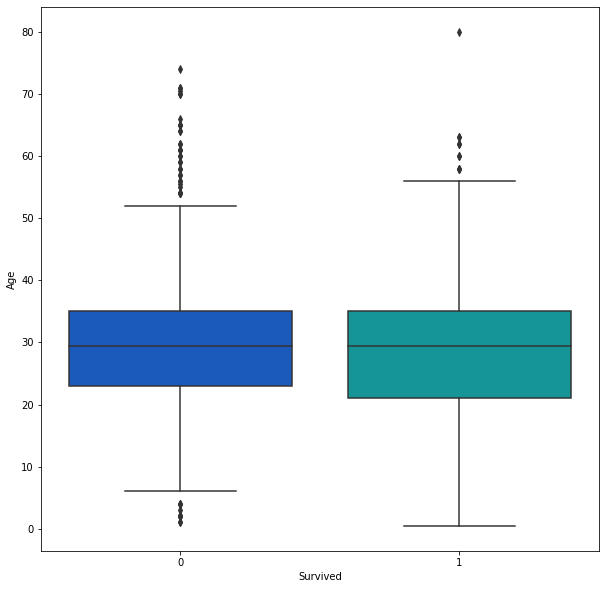

In [146]:
## Box Plot which shows passenger survival by age
plt.figure(figsize=(10,10))
sns.boxplot(x="Survived",y="Age",data=df,palette="winter")

In [147]:
###Visualization:
##Read from sample superstore xl file  into pandas dataframe and perform below operations
df=pd.read_excel("Downloads/sample_-_superstore_2.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [148]:
##Display Subcategory wise sum of profit
df.groupby("Sub-Category")["Profit"].sum()


Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [149]:
##Exclude Office Furniture SubCategory
pd.unique(df["Sub-Category"])


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [150]:
##Sort SubCategory in Desc order
df["Sub-Category"].sort_values(ascending=False)

1456         Tables
2984         Tables
9603         Tables
8156         Tables
7169         Tables
915          Tables
1395         Tables
1394         Tables
1873         Tables
8143         Tables
1872         Tables
9624         Tables
8136         Tables
4551         Tables
5978         Tables
4002         Tables
4540         Tables
9637         Tables
9639         Tables
5997         Tables
6876         Tables
453          Tables
1863         Tables
1374         Tables
557          Tables
3979         Tables
8167         Tables
8168         Tables
746          Tables
9221         Tables
           ...     
5104    Accessories
5087    Accessories
692     Accessories
5082    Accessories
4737    Accessories
4753    Accessories
4766    Accessories
4787    Accessories
4821    Accessories
4875    Accessories
4881    Accessories
4887    Accessories
4968    Accessories
714     Accessories
4975    Accessories
4981    Accessories
5000    Accessories
5004    Accessories
5018    Accessories


([<matplotlib.patches.Wedge at 0x20a88b1a2b0>,
 [Text(1.0775459327214676, 0.2211216020098955, 'Furniture'),
  Text(-0.19438549183984183, 1.0826884503688874, 'Office Supplies'),
  Text(-0.027224072906978994, -1.0996630619668717, 'Technology')],
 [Text(0.5877523269389823, 0.12061178291448844, '6.4%'),
  Text(-0.10602845009445917, 0.5905573365648477, '42.8%'),
  Text(-0.014849494312897631, -0.5998162156182936, '50.8%')])

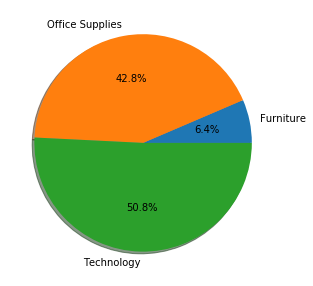

In [151]:
##Categorywise sum of profit in pie chart
res=df.groupby("Category")["Profit"].sum()
fig1,ax1=plt.subplots(figsize=(9,5))
labels=["Furniture","Office Supplies","Technology"]
ax1.pie(res,labels=labels,autopct="%1.1f%%",shadow=True)

Text(0, 0.5, 'Profit')

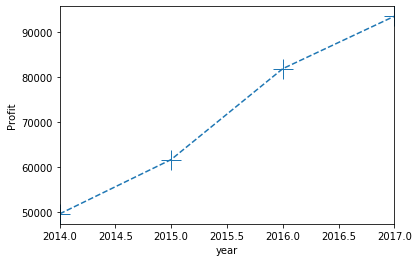

In [152]:
##Line Chart yearwise sum of profit
df["year"]=df["Order Date"].dt.year
df.groupby("year")["Profit"].sum().plot(linestyle="--",marker="+",markersize=20,markerfacecolor="black")
plt.ylabel("Profit")


In [153]:
##Display Top 10 most profitable customers
df[["Profit","Customer Name"]].sort_values(ascending=False,by="Profit").head(10)

,Profit,Customer Name
6826,8399.9760,Tamara Chand
8153,6719.9808,Raymond Buch
4190,5039.9856,Hunter Lopez
9039,4946.3700,Adrian Barton
4098,4630.4755,Sanjit Chand
2623,3919.9888,Tom Ashbrook
509,3177.4750,Christopher Martinez
8488,2799.9840,Sanjit Engle
7666,2591.9568,Daniel Raglin
6520,2504.2216,Andy Reiter


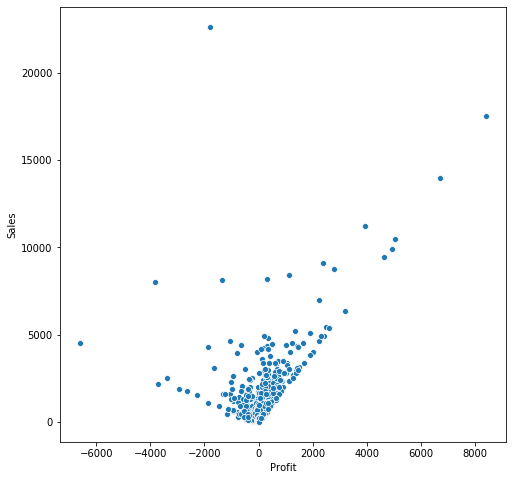

In [154]:
##scatter plot between profit and sales
plt.figure(figsize=(8,8))
sns.scatterplot(x="Profit",y="Sales",data=df)

In [156]:
#Create dept dataframe and emp dataframe  with suitable data and perform inner , leftouter,RightOuter andFullOuter Joins based on common column Deptno.

#Dept Data Frame will have
#Deptno
#Dname
#Loc

Dept=pd.DataFrame({"Deptno":[1,2,3,4,5],
                  "Dname":["IT","HR","Finance","Tech","Support"],
                  "Loc":["Delhi","Bangalore","Mumbai","Delhi","Bangalore"]})
Dept.head()

,Deptno,Dname,Loc
0,1,IT,Delhi
1,2,HR,Bangalore
2,3,Finance,Mumbai
3,4,Tech,Delhi
4,5,Support,Bangalore


In [157]:
#Emp DataFrame will have below columns
#Deptno
#Eno
#Sal

Emp=pd.DataFrame({"Deptno":[2,3,4,1,6],
                 "Eno":[1001,1002,1003,1004,1005],
                 "Sal":[25000,32000,18000,45000,36000]})
Emp.head()


,Deptno,Eno,Sal
0,2,1001,25000
1,3,1002,32000
2,4,1003,18000
3,1,1004,45000
4,6,1005,36000


In [158]:
#perform inner , leftouter,RightOuter andFullOuter Joins based on common column Deptno
#Left Join
print(pd.merge(Dept,Emp,on="Deptno",how="left"))

   Deptno    Dname        Loc     Eno      Sal
0       1       IT      Delhi  1004.0  45000.0
1       2       HR  Bangalore  1001.0  25000.0
2       3  Finance     Mumbai  1002.0  32000.0
3       4     Tech      Delhi  1003.0  18000.0
4       5  Support  Bangalore     NaN      NaN


In [159]:
#Right Join
print(pd.merge(Dept,Emp,on="Deptno",how="right"))

   Deptno    Dname        Loc   Eno    Sal
0       1       IT      Delhi  1004  45000
1       2       HR  Bangalore  1001  25000
2       3  Finance     Mumbai  1002  32000
3       4     Tech      Delhi  1003  18000
4       6      NaN        NaN  1005  36000


In [160]:
#FullOuter Join
print(pd.merge(Dept,Emp,on="Deptno",how="outer"))

   Deptno    Dname        Loc     Eno      Sal
0       1       IT      Delhi  1004.0  45000.0
1       2       HR  Bangalore  1001.0  25000.0
2       3  Finance     Mumbai  1002.0  32000.0
3       4     Tech      Delhi  1003.0  18000.0
4       5  Support  Bangalore     NaN      NaN
5       6      NaN        NaN  1005.0  36000.0


In [161]:
#inner Join
print(pd.merge(Dept,Emp,on="Deptno",how="inner"))

   Deptno    Dname        Loc   Eno    Sal
0       1       IT      Delhi  1004  45000
1       2       HR  Bangalore  1001  25000
2       3  Finance     Mumbai  1002  32000
3       4     Tech      Delhi  1003  18000


In [ ]:
#Descriptive and Inferential Statistics:
#7.Suppose the height of men in the United Kingdom is known to be normally distributed with a mean of
#177 centimeters and a standard deviation of 10 centimeters. If you were to select a man from the United Kingdom
#population at random, what is the probability that he 
#would be more than 200 centimeters tall?
Let the height of a man be x cm
Z=(x-mean)/standard_deviation
P(X>200)=P(Z>(200-177)/10)=P(Z>2.3)
P(Z>2.3)=0.9893


-0.7761683718265865


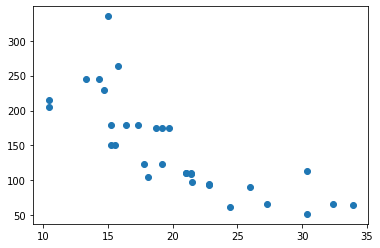

In [165]:
#Let's take the mileage and horsepower of various cars and see if there is a relation between the two.

mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

print(np.corrcoef(mpg,hp)[0,1])
plt.scatter(mpg,hp)


In [167]:
#Perform T-test on two classes that are given a mathematics test and have 10 students in each class. Determine if 2 distributions are identical or not.

class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])

from scipy import stats
res=stats.ttest_ind(class1_score,class2_score)
res
##AS p value is less than 0.05, hence we reject the null hypothesis which states there is not much significant
#difference in these 2 classes


Ttest_indResult(statistic=-5.458195056848408, pvalue=3.482072285015316e-05)

In [171]:
##The mean score of the mathematics exam at a national level is 60 marks and the standard deviation is 3 marks.
##The mean marks of a class are 53. The null hypothesis is that the mean marks of the class are similar
#to the national average.  Test this Hypothesis using Z – Test.

Z=(53-60)/3
print(Z)
p_value=stats.norm.cdf(Z)
p_value
#Hence p_value is less than 0.05.So, we reject the null hypothesis.The mean marks of the class are  not similar
#to the national average

-2.3333333333333335


0.009815328628645334

0.9671193682556305


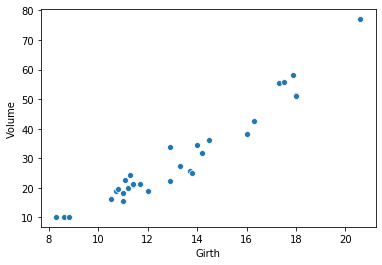

In [177]:
#Calculate Pearson correlation coefficient between Girth and Volume in trees dataset( trees csv file)Pl mention 
#what you draw from correlation coefficient

df=pd.read_csv("Documents/trees.csv")
df.head()
print(np.corrcoef(df["Girth"],df["Volume"])[0,1])
sns.scatterplot(x="Girth",y="Volume",data=df)
##Here both Girth and Volume are positively correlated with other.As one feature increases, another also increases.
#There is 96% correlation between these two

In [179]:
##Suppose that you want to perform a hypothesis test to help determine whether the correlation between tree girth and tree volume 
#is statistically significant. Perform a two-sided test of the Pearson's product moment correlation 
#between tree girth and volume at the 5% significance level

res=stats.ttest_ind(df["Girth"],df["Volume"])
res
## As p value is less than 0.05,we reject the null hypothesis.There is statistical diffrence between these two
#variables.

Ttest_indResult(statistic=-5.6302684259801605, pvalue=5.044051066140026e-07)

In [464]:
#Use Automobile price data Raw csv file : 
#•	Split data 80% to train 20% for test
#•	predict price for 20% test data
#•	Determine R-Squared value
df=pd.read_csv("Documents/Automobile price data_raw.csv")
df.head()




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [465]:
df.replace("?",np.nan,inplace=True)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [467]:
df["normalized-losses"]=df["normalized-losses"].astype(float)
m=df["normalized-losses"].mean(skipna=True)
df["normalized-losses"]=df["normalized-losses"].fillna(m)


In [468]:
df.groupby("num-of-doors").size()

num-of-doors
four    114
two      89
dtype: int64

In [469]:
common_value="four"
df["num-of-doors"]=df["num-of-doors"].fillna(common_value)

In [470]:
df["bore"]=df["bore"].astype(float)
m=df["bore"].mean(skipna=True)
df["bore"]=df["bore"].fillna(m)

df["stroke"]=df["stroke"].astype(float)
m=df["stroke"].mean(skipna=True)
df["stroke"]=df["stroke"].fillna(m)

df["horsepower"]=df["horsepower"].astype(float)
m=df["horsepower"].mean(skipna=True)
df["horsepower"]=df["horsepower"].fillna(m)

df["peak-rpm"]=df["peak-rpm"].astype(float)
m=df["peak-rpm"].mean(skipna=True)
df["peak-rpm"]=df["peak-rpm"].fillna(m)

df["price"]=df["price"].astype(float)
m=df["price"].mean(skipna=True)
df["price"]=df["price"].fillna(m)

In [471]:
make1=pd.get_dummies(df["make"],drop_first=True)
df.drop("make",axis=1,inplace=True)
df=pd.concat([df,make1],axis=1)

In [472]:
pd.unique(df["fuel-type"])
fuel=pd.get_dummies(df["fuel-type"],drop_first=True)
df.drop("fuel-type",axis=1,inplace=True)
df=pd.concat([df,fuel],axis=1)
df.head()

,symboling,normalized-losses,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas
0,3,122.0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
1,3,122.0,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,1
2,1,122.0,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,1
3,2,164.0,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,1
4,2,164.0,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,1


In [473]:
pd.unique(df["aspiration"])
asp=pd.get_dummies(df["aspiration"],drop_first=True)
df.drop("aspiration",axis=1,inplace=True)
df=pd.concat([df,asp],axis=1)
df.head()

,symboling,normalized-losses,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo
0,3,122.0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,1,0
1,3,122.0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,1,0
2,1,122.0,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,1,0
3,2,164.0,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,1,0
4,2,164.0,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,1,0


In [474]:
doors=pd.get_dummies(df["num-of-doors"],drop_first=True)
df.drop("num-of-doors",axis=1,inplace=True)
df=pd.concat([df,doors],axis=1)
df.head()

,symboling,normalized-losses,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,two
0,3,122.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,1
1,3,122.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,1
2,1,122.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,1
3,2,164.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [475]:
pd.unique(df["body-style"])
body=pd.get_dummies(df["body-style"],drop_first=True)
df.drop("body-style",axis=1,inplace=True)
df=pd.concat([df,body],axis=1)
df.head()

,symboling,normalized-losses,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,toyota,volkswagen,volvo,gas,turbo,two,hardtop,hatchback,sedan,wagon
0,3,122.0,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,1,0,1,0,0,0,0
1,3,122.0,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,0,0,0,1,0,1,0,0,0,0
2,1,122.0,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,0,0,0,1,0,1,0,1,0,0
3,2,164.0,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,0,0,0,1,0,0,0,0,1,0
4,2,164.0,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,0,0,0,1,0,0,0,0,1,0


In [476]:
pd.unique(df["drive-wheels"])
drv_wheels=pd.get_dummies(df["drive-wheels"],drop_first=True)
df.drop("drive-wheels",axis=1,inplace=True)
df=pd.concat([df,drv_wheels],axis=1)
df.head()

,symboling,normalized-losses,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,...,volvo,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,122.0,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,1,0,1,0,0,0,0,0,1
1,3,122.0,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,0,1,0,1,0,0,0,0,0,1
2,1,122.0,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,0,1,0,1,0,1,0,0,0,1
3,2,164.0,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,0,1,0,0,0,0,1,0,1,0
4,2,164.0,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,0,1,0,0,0,0,1,0,0,0


In [477]:
pd.unique(df["engine-location"])
eng_loc=pd.get_dummies(df["engine-location"],drop_first=True)
df.drop("engine-location",axis=1,inplace=True)
df=pd.concat([df,eng_loc],axis=1)
df.head()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,...,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear
0,3,122.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,0,1,0,0,0,0,0,1,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,0,1,0,0,0,0,0,1,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,1,0,1,0,1,0,0,0,1,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,1,0,0,0,0,1,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,1,0,0,0,0,1,0,0,0,0


In [478]:
eng_typ=pd.get_dummies(df["engine-type"],drop_first=True)
df.drop("engine-type",axis=1,inplace=True)
df=pd.concat([df,eng_typ],axis=1)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,122.0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,0,1,0,0,0,0,0,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,...,0,0,1,0,0,0,0,0,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,six,152,mpfi,...,0,0,1,0,0,0,0,0,1,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,four,109,mpfi,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,five,136,mpfi,...,0,0,0,0,0,0,1,0,0,0


In [479]:
cyl=pd.get_dummies(df["num-of-cylinders"],drop_first=True)
df.drop("num-of-cylinders",axis=1,inplace=True)
df=pd.concat([df,cyl],axis=1)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,fuel-system,bore,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,...,0,0,0,0,0,1,0,0,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,...,0,0,1,0,0,0,1,0,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,...,1,0,0,0,0,1,0,0,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,...,1,0,0,0,1,0,0,0,0,0


In [480]:
fuel=pd.get_dummies(df["fuel-system"],drop_first=True)
df.drop("fuel-system",axis=1,inplace=True)
df=pd.concat([df,fuel],axis=1)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [481]:
#from sklearn.preprocessing import StandardScaler
#StandardScaler_X=StandardScaler()
#new_df=StandardScaler_X.fit_transform(df)
#new_df=pd.DataFrame(new_df,columns=df.columns)
#new_df.head()
X=df.drop("price",axis=1)
Y=df["price"]


In [482]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [483]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [484]:
model.score(X_test,Y_test)

0.6709101387100649

In [485]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X=X.values
Y=Y.values



In [486]:
#print(new_df.shape)
X=np.append(arr=np.ones((205,1)).astype(float),values=X,axis=1)
len(X[0])

66

In [487]:
X_opt=X[:,0:66]
X_opt

array([[  1.,   3., 122., ...,   1.,   0.,   0.],
       [  1.,   3., 122., ...,   1.,   0.,   0.],
       [  1.,   1., 122., ...,   1.,   0.,   0.],
       ...,
       [  1.,  -1.,  95., ...,   1.,   0.,   0.],
       [  1.,  -1.,  95., ...,   0.,   0.,   0.],
       [  1.,  -1.,  95., ...,   1.,   0.,   0.]])

In [488]:
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     57.57
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.97e-76
Time:                        14:34:27   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3718.
Df Residuals:                     143   BIC:                             3924.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.689e+04    1.1e+04     -2.437      0.016   -4.87e+04   -5078.559
x1           -53.1899    267.500     -0.199      0.843    -581.955     475.575
x2            -2.9053      7.892     -0.368      0.713     -18.505      12.694
x3           253.1794     96.208      2.632      0.009      63.006     443.353
x4          -156.5827     52.572     -2.978      0.003    -260.502     -52.664
x5           852.5132    237.685      3.587      0.000     382.684    1322.342
x6          -255.4746    151.684     -1.684      0.094    -555.307      44.358
x7             5.9462      1.790      3.322      0.001       2.408       9.484
x8           102.5149     27.037      3.792      0.000      49.071     155.959
x9         -3512.0075   1965.934     -1.786      0.076   -7398.054     374.039
x10        -1098.4810   1054.444     -1.042      0.299   -3182.793     985.831
x11         -661.0149    517.663     -1.277      0.204   -1684.275     362.245
x12           -7.7059     25.651     -0.300      0.764     -58.411      42.999
x13            2.5975      0.689      3.772      0.000       1.236       3.959
x14           16.7605    142.600      0.118      0.907    -265.116     298.637
x15           92.8755    121.744      0.763      0.447    -147.775     333.526
x16         -741.6784   2597.401     -0.286      0.776   -5875.940    4392.583
x17         5294.4033   2597.494      2.038      0.043     159.958    1.04e+04
x18        -5772.4173   2380.227     -2.425      0.017   -1.05e+04   -1067.441
x19        -6278.6043   2039.464     -3.079      0.002   -1.03e+04   -2247.213
x20        -3597.1572   2329.878     -1.544      0.125   -8202.610    1008.295
x21         -871.1948   2197.340     -0.396      0.692   -5214.660    3472.270
x22        -2437.6529   2982.322     -0.817      0.415   -8332.785    3457.480
x23        -3094.9373   1900.095     -1.629      0.106   -6850.841     660.966
x24         1584.6743   2693.602      0.588      0.557   -3739.749    6909.097
x25        -3805.4311   3165.832     -1.202      0.231   -1.01e+04    2452.444
x26        -6674.5096   2079.931     -3.209      0.002   -1.08e+04   -2563.126
x27        -3632.0288   1893.504     -1.918      0.057   -7374.903     110.846
x28        -5557.2702   1987.479     -2.796      0.006   -9485.905   -1628.635
x29        -6235.8053   2018.848     -3.089      0.002   -1.02e+04   -2245.165
x30         2475.8879   3201.695      0.773      0.441   -3852.878    8804.654
x31        -4666.2948   2414.622     -1.933      0.055   -9439.258     106.669
x32          592.3685   2352.116      0.252      0.802   -4057.042    5241.779
x33        -5319.0680   1745.237     -3.048      0.003   -8768.864   -1869.272
x34        -3996.5530   1716.044     -2.329      0.021   -7388.644    -604.462
x35        -3261.7913   2023.487     -1.612      0.109   -7261.603     738.021
x3

In [490]:
#x48-0.910
#x14-0.907
X_opt=np.delete(X_opt,48,axis=1)
X_opt

array([[  1.,   3., 122., ...,   1.,   0.,   0.],
       [  1.,   3., 122., ...,   1.,   0.,   0.],
       [  1.,   1., 122., ...,   1.,   0.,   0.],
       ...,
       [  1.,  -1.,  95., ...,   1.,   0.,   0.],
       [  1.,  -1.,  95., ...,   0.,   0.,   0.],
       [  1.,  -1.,  95., ...,   1.,   0.,   0.]])

In [491]:
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     57.57
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.97e-76
Time:                        15:53:25   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3718.
Df Residuals:                     143   BIC:                             3924.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.689e+04    1.1e+04     -2.437      0.016   -4.87e+04   -5078.559
x1           -53.1899    267.500     -0.199      0.843    -581.955     475.575
x2            -2.9053      7.892     -0.368      0.713     -18.505      12.694
x3           253.1794     96.208      2.632      0.009      63.006     443.353
x4          -156.5827     52.572     -2.978      0.003    -260.502     -52.664
x5           852.5132    237.685      3.587      0.000     382.684    1322.342
x6          -255.4746    151.684     -1.684      0.094    -555.307      44.358
x7             5.9462      1.790      3.322      0.001       2.408       9.484
x8           102.5149     27.037      3.792      0.000      49.071     155.959
x9         -3512.0075   1965.934     -1.786      0.076   -7398.054     374.039
x10        -1098.4810   1054.444     -1.042      0.299   -3182.793     985.831
x11         -661.0149    517.663     -1.277      0.204   -1684.275     362.245
x12           -7.7059     25.651     -0.300      0.764     -58.411      42.999
x13            2.5975      0.689      3.772      0.000       1.236       3.959
x14           16.7605    142.600      0.118      0.907    -265.116     298.637
x15           92.8755    121.744      0.763      0.447    -147.775     333.526
x16         -741.6784   2597.401     -0.286      0.776   -5875.940    4392.583
x17         5294.4033   2597.494      2.038      0.043     159.958    1.04e+04
x18        -5772.4173   2380.227     -2.425      0.017   -1.05e+04   -1067.441
x19        -6278.6043   2039.464     -3.079      0.002   -1.03e+04   -2247.213
x20        -3597.1572   2329.878     -1.544      0.125   -8202.610    1008.295
x21         -871.1948   2197.340     -0.396      0.692   -5214.660    3472.270
x22        -2437.6529   2982.322     -0.817      0.415   -8332.785    3457.480
x23        -3094.9373   1900.095     -1.629      0.106   -6850.841     660.966
x24         1584.6743   2693.602      0.588      0.557   -3739.749    6909.097
x25        -3805.4311   3165.832     -1.202      0.231   -1.01e+04    2452.444
x26        -6674.5096   2079.931     -3.209      0.002   -1.08e+04   -2563.126
x27        -3632.0288   1893.504     -1.918      0.057   -7374.903     110.846
x28        -5755.0026   2278.983     -2.525      0.013   -1.03e+04   -1250.156
x29        -6235.8053   2018.848     -3.089      0.002   -1.02e+04   -2245.165
x30         2475.8879   3201.695      0.773      0.441   -3852.878    8804.654
x31        -4666.2948   2414.622     -1.933      0.055   -9439.258     106.669
x32          592.3685   2352.116      0.252      0.802   -4057.042    5241.779
x33        -5319.0680   1745.237     -3.048      0.003   -8768.864   -1869.272
x34        -3996.5530   1716.044     -2.329      0.021   -7388.644    -604.462
x35        -3261.7913   2023.487     -1.612      0.109   -7261.603     738.021
x3

In [492]:
X_opt=np.delete(X_opt,14,axis=1)
X_opt
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     58.93
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           2.56e-77
Time:                        15:56:07   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3716.
Df Residuals:                     144   BIC:                             3919.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.697e+04    1.1e+04     -2.458      0.015   -4.87e+04   -5279.236
x1           -54.0961    266.472     -0.203      0.839    -580.797     472.605
x2            -2.9222      7.863     -0.372      0.711     -18.465      12.620
x3           252.4201     95.662      2.639      0.009      63.338     441.502
x4          -156.7930     52.362     -2.994      0.003    -260.290     -53.296
x5           855.9158    235.106      3.641      0.000     391.212    1320.620
x6          -254.6840    151.015     -1.686      0.094    -553.177      43.809
x7             5.9156      1.765      3.352      0.001       2.427       9.404
x8           102.9047     26.741      3.848      0.000      50.050     155.760
x9         -3545.6494   1938.314     -1.829      0.069   -7376.873     285.575
x10        -1085.9520   1045.444     -1.039      0.301   -3152.351     980.446
x11         -648.5672    504.975     -1.284      0.201   -1646.689     349.555
x12           -8.0565     25.390     -0.317      0.751     -58.241      42.128
x13            2.5965      0.686      3.784      0.000       1.240       3.953
x14          105.0665     63.526      1.654      0.100     -20.497     230.630
x15         -736.1004   2588.059     -0.284      0.776   -5851.594    4379.393
x16         5339.8138   2559.788      2.086      0.039     280.200    1.04e+04
x17        -5700.4929   2292.329     -2.487      0.014   -1.02e+04   -1169.532
x18        -6253.6787   2021.450     -3.094      0.002   -1.02e+04   -2258.131
x19        -3569.3076   2309.848     -1.545      0.124   -8134.895     996.280
x20         -804.6218   2115.801     -0.380      0.704   -4986.661    3377.417
x21        -2390.8999   2945.537     -0.812      0.418   -8212.974    3431.175
x22        -3066.6677   1878.346     -1.633      0.105   -6779.359     646.024
x23         1618.3254   2669.156      0.606      0.545   -3657.462    6894.113
x24        -3751.3280   3121.444     -1.202      0.231   -9921.097    2418.441
x25        -6647.6291   2060.228     -3.227      0.002   -1.07e+04   -2575.434
x26        -3598.7718   1865.821     -1.929      0.056   -7286.707      89.163
x27        -5716.3753   2247.426     -2.544      0.012   -1.02e+04   -1274.169
x28        -6203.0852   1992.703     -3.113      0.002   -1.01e+04   -2264.359
x29         2474.4002   3190.688      0.776      0.439   -3832.234    8781.035
x30        -4683.4542   2401.937     -1.950      0.053   -9431.062      64.154
x31          592.8552   2344.045      0.253      0.801   -4040.325    5226.036
x32        -5293.6642   1725.861     -3.067      0.003   -8704.959   -1882.370
x33        -3957.6168   1677.990     -2.359      0.020   -7274.289    -640.944
x34        -3253.4063   2015.293     -1.614      0.109   -7236.784     729.972
x35        -2894.2210   2293.010     -1.262      0.209   -7426.528    1638.086
x3

In [493]:
#x1-0.839,x31-0.801,x38-0.820,x58-0.850,x60-0.889
X_opt=np.delete(X_opt,60,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     60.33
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.31e-78
Time:                        16:06:32   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3714.
Df Residuals:                     145   BIC:                             3914.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.687e+04   1.09e+04     -2.462      0.015   -4.84e+04   -5299.547
x1           -46.8866    260.566     -0.180      0.857    -561.885     468.112
x2            -2.8911      7.834     -0.369      0.713     -18.374      12.592
x3           251.9408     95.277      2.644      0.009      63.630     440.251
x4          -156.1546     51.986     -3.004      0.003    -258.903     -53.406
x5           856.7752    234.230      3.658      0.000     393.830    1319.721
x6          -256.7090    149.812     -1.714      0.089    -552.807      39.389
x7             5.9294      1.756      3.377      0.001       2.459       9.400
x8           102.5058     26.499      3.868      0.000      50.132     154.879
x9         -3545.2959   1931.749     -1.835      0.069   -7363.320     272.728
x10        -1078.7146   1040.630     -1.037      0.302   -3135.478     978.048
x11         -653.0164    502.268     -1.300      0.196   -1645.729     339.697
x12           -7.5969     25.092     -0.303      0.763     -57.190      41.996
x13            2.5841      0.678      3.811      0.000       1.244       3.924
x14          103.6594     62.514      1.658      0.099     -19.897     227.216
x15         -766.2005   2570.385     -0.298      0.766   -5846.462    4314.061
x16         5345.1292   2550.839      2.095      0.038     303.498    1.04e+04
x17        -5683.5400   2281.379     -2.491      0.014   -1.02e+04   -1174.487
x18        -6231.5738   2008.454     -3.103      0.002   -1.02e+04   -2261.947
x19        -3682.5758   2156.288     -1.708      0.090   -7944.393     579.241
x20         -794.9007   2107.501     -0.377      0.707   -4960.291    3370.489
x21        -2401.9209   2934.514     -0.819      0.414   -8201.869    3398.028
x22        -3075.0738   1871.029     -1.644      0.102   -6773.087     622.939
x23         1619.1467   2660.111      0.609      0.544   -3638.455    6876.748
x24        -3771.2380   3107.645     -1.214      0.227   -9913.374    2370.898
x25        -6667.3593   2048.445     -3.255      0.001   -1.07e+04   -2618.691
x26        -3605.9099   1858.809     -1.940      0.054   -7279.770      67.950
x27        -5720.8073   2239.593     -2.554      0.012   -1.01e+04   -1294.342
x28        -6201.6165   1985.927     -3.123      0.002   -1.01e+04   -2276.512
x29         2451.7215   3175.785      0.772      0.441   -3825.089    8728.532
x30        -4711.9436   2385.202     -1.975      0.050   -9426.198       2.311
x31          550.6692   2316.736      0.238      0.812   -4028.266    5129.605
x32        -5308.4742   1716.785     -3.092      0.002   -8701.630   -1915.318
x33        -3955.4342   1672.235     -2.365      0.019   -7260.540    -650.329
x34        -3267.7817   2005.861     -1.629      0.105   -7232.285     696.722
x35        -2877.6408   2282.197     -1.261      0.209   -7388.311    1633.029
x3

In [494]:
X_opt=np.delete(X_opt,1,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     61.78
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           4.25e-79
Time:                        16:09:15   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3712.
Df Residuals:                     146   BIC:                             3909.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -2.7e+04   1.09e+04     -2.488      0.014   -4.84e+04   -5550.780
x1            -3.0186      7.776     -0.388      0.698     -18.386      12.349
x2           256.4284     91.649      2.798      0.006      75.297     437.559
x3          -155.2870     51.590     -3.010      0.003    -257.247     -53.327
x4           852.4083    232.196      3.671      0.000     393.509    1311.307
x5          -253.8833    148.492     -1.710      0.089    -547.356      39.589
x6             5.9237      1.750      3.385      0.001       2.465       9.382
x7           101.4055     25.698      3.946      0.000      50.618     152.193
x8         -3547.9330   1925.281     -1.843      0.067   -7352.955     257.089
x9         -1067.7996   1035.412     -1.031      0.304   -3114.132     978.533
x10         -662.0658    498.085     -1.329      0.186   -1646.455     322.323
x11           -6.9361     24.739     -0.280      0.780     -55.829      41.957
x12            2.5804      0.676      3.819      0.000       1.245       3.916
x13          104.2527     62.220      1.676      0.096     -18.715     227.220
x14         -889.1497   2469.680     -0.360      0.719   -5770.092    3991.792
x15         5342.5032   2542.331      2.101      0.037     317.979    1.04e+04
x16        -5684.2675   2273.803     -2.500      0.014   -1.02e+04   -1190.447
x17        -6246.8947   1999.987     -3.123      0.002   -1.02e+04   -2294.228
x18        -3678.4389   2149.009     -1.712      0.089   -7925.623     568.746
x19         -785.6346   2099.878     -0.374      0.709   -4935.720    3364.451
x20        -2361.8864   2916.355     -0.810      0.419   -8125.613    3401.840
x21        -3088.6893   1863.293     -1.658      0.100   -6771.200     593.821
x22         1607.6963   2650.523      0.607      0.545   -3630.652    6846.045
x23        -3787.4802   3096.023     -1.223      0.223   -9906.293    2331.332
x24        -6705.8285   2030.496     -3.303      0.001   -1.07e+04   -2692.866
x25        -3627.9619   1848.608     -1.963      0.052   -7281.450      25.526
x26        -5738.1386   2230.094     -2.573      0.011   -1.01e+04   -1330.701
x27        -6215.0446   1977.937     -3.142      0.002   -1.01e+04   -2305.956
x28         2430.4786   3163.056      0.768      0.443   -3820.813    8681.770
x29        -4733.7914   2374.202     -1.994      0.048   -9426.036     -41.547
x30          431.2718   2212.314      0.195      0.846   -3941.026    4803.569
x31        -5309.9551   1711.067     -3.103      0.002   -8691.614   -1928.296
x32        -3960.7346   1666.426     -2.377      0.019   -7254.168    -667.301
x33        -3355.6506   1939.056     -1.731      0.086   -7187.895     476.594
x34        -2833.9168   2261.692     -1.253      0.212   -7303.802    1635.969
x35        -1.843e+04   5538.538     -3.328      0.001   -2.94e+04   -7487.008
x3

In [495]:
X_opt=np.delete(X_opt,30,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     63.28
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.41e-80
Time:                        16:10:58   Log-Likelihood:                -1797.2
No. Observations:                 205   AIC:                             3710.
Df Residuals:                     147   BIC:                             3903.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.769e+04   1.02e+04     -2.711      0.007   -4.79e+04   -7508.288
x1            -2.4887      7.261     -0.343      0.732     -16.838      11.861
x2           254.5816     90.860      2.802      0.006      75.022     434.142
x3          -154.1030     51.064     -3.018      0.003    -255.017     -53.189
x4           853.5482    231.361      3.689      0.000     396.324    1310.772
x5          -243.0053    137.158     -1.772      0.079    -514.061      28.051
x6             5.9223      1.744      3.395      0.001       2.475       9.369
x7           100.1571     24.805      4.038      0.000      51.136     149.179
x8         -3392.7911   1747.352     -1.942      0.054   -6845.966      60.383
x9         -1122.1114    993.956     -1.129      0.261   -3086.401     842.179
x10         -642.6612    486.438     -1.321      0.189   -1603.976     318.654
x11           -5.9496     24.137     -0.246      0.806     -53.649      41.750
x12            2.5960      0.669      3.883      0.000       1.275       3.917
x13          104.9994     61.898      1.696      0.092     -17.326     227.325
x14        -1221.2613   1782.129     -0.685      0.494   -4743.165    2300.642
x15         4983.6604   1747.822      2.851      0.005    1529.556    8437.765
x16        -5928.1702   1892.404     -3.133      0.002   -9668.001   -2188.339
x17        -6490.5340   1556.270     -4.171      0.000   -9566.087   -3414.981
x18        -3922.9986   1739.101     -2.256      0.026   -7359.869    -486.128
x19        -1020.1369   1715.531     -0.595      0.553   -4410.426    2370.152
x20        -2478.1766   2845.336     -0.871      0.385   -8101.225    3144.872
x21        -3362.0757   1222.815     -2.749      0.007   -5778.644    -945.507
x22         1343.3752   2269.992      0.592      0.555   -3142.659    5829.409
x23        -4170.8939   2383.189     -1.750      0.082   -8880.632     538.844
x24        -6960.7020   1548.461     -4.495      0.000      -1e+04   -3900.582
x25        -3899.2694   1212.736     -3.215      0.002   -6295.918   -1502.621
x26        -5930.8368   1992.499     -2.977      0.003   -9868.479   -1993.194
x27        -6452.3339   1553.922     -4.152      0.000   -9523.246   -3381.421
x28         2049.7008   2479.731      0.827      0.410   -2850.826    6950.227
x29        -5013.1831   1886.612     -2.657      0.009   -8741.569   -1284.797
x30        -5487.5140   1443.746     -3.801      0.000   -8340.694   -2634.334
x31        -4209.7706   1066.537     -3.947      0.000   -6317.496   -2102.045
x32        -3655.5822   1176.273     -3.108      0.002   -5980.172   -1330.992
x33        -3159.5569   1519.748     -2.079      0.039   -6162.933    -156.181
x34        -1.867e+04   5382.162     -3.469      0.001   -2.93e+04   -8036.762
x35         1924.3844    826.628      2.328      0.021     290.774    3557.995
x3

In [496]:
X_opt=np.delete(X_opt,56,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     64.82
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           6.86e-81
Time:                        16:13:33   Log-Likelihood:                -1797.3
No. Observations:                 205   AIC:                             3709.
Df Residuals:                     148   BIC:                             3898.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.767e+04   1.02e+04     -2.718      0.007   -4.78e+04   -7552.270
x1            -2.4093      7.230     -0.333      0.739     -16.697      11.878
x2           254.2943     90.561      2.808      0.006      75.334     433.254
x3          -154.4890     50.874     -3.037      0.003    -255.023     -53.955
x4           850.2198    230.191      3.694      0.000     395.333    1305.106
x5          -241.0965    136.481     -1.767      0.079    -510.799      28.606
x6             5.9130      1.738      3.402      0.001       2.478       9.348
x7           100.4032     24.704      4.064      0.000      51.585     149.222
x8         -3410.8426   1740.091     -1.960      0.052   -6849.476      27.791
x9         -1130.1459    990.196     -1.141      0.256   -3086.895     826.603
x10         -636.5201    484.187     -1.315      0.191   -1593.332     320.292
x11           -5.1724     23.834     -0.217      0.828     -52.270      41.926
x12            2.5872      0.665      3.888      0.000       1.272       3.902
x13          105.8909     61.585      1.719      0.088     -15.808     227.590
x14        -1213.6968   1776.145     -0.683      0.495   -4723.578    2296.184
x15         4997.4111   1741.264      2.870      0.005    1556.460    8438.362
x16        -5914.8329   1885.511     -3.137      0.002   -9640.834   -2188.832
x17        -6460.2938   1546.009     -4.179      0.000   -9515.398   -3405.190
x18        -3796.5206   1648.853     -2.303      0.023   -7054.857    -538.184
x19        -1000.0976   1707.944     -0.586      0.559   -4375.204    2375.009
x20        -2449.2046   2833.592     -0.864      0.389   -8048.729    3150.320
x21        -3339.9125   1215.294     -2.748      0.007   -5741.482    -938.343
x22         1363.2814   2261.169      0.603      0.547   -3105.065    5831.627
x23        -4183.2613   2374.996     -1.761      0.080   -8876.544     510.021
x24        -6938.4582   1540.639     -4.504      0.000   -9982.950   -3893.966
x25        -3883.3419   1206.979     -3.217      0.002   -6268.481   -1498.203
x26        -5883.3017   1975.918     -2.978      0.003   -9787.958   -1978.646
x27        -6431.1288   1546.354     -4.159      0.000   -9486.914   -3375.343
x28         2045.3335   2471.736      0.827      0.409   -2839.120    6929.787
x29        -5002.1424   1880.002     -2.661      0.009   -8717.257   -1287.028
x30        -5459.2438   1434.151     -3.807      0.000   -8293.302   -2625.185
x31        -4194.1257   1061.065     -3.953      0.000   -6290.919   -2097.332
x32        -3646.1061   1171.828     -3.111      0.002   -5961.781   -1330.431
x33        -3133.3800   1510.835     -2.074      0.040   -6118.975    -147.785
x34        -1.869e+04   5364.244     -3.485      0.001   -2.93e+04   -8093.486
x35         1917.4602    823.465      2.329      0.021     290.192    3544.728
x3

In [497]:
X_opt=np.delete(X_opt,11,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     66.43
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           8.56e-82
Time:                        16:15:18   Log-Likelihood:                -1797.3
No. Observations:                 205   AIC:                             3707.
Df Residuals:                     149   BIC:                             3893.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.753e+04   1.01e+04     -2.718      0.007   -4.75e+04   -7519.682
x1            -2.3105      7.193     -0.321      0.748     -16.523      11.902
x2           256.2661     89.816      2.853      0.005      78.789     433.743
x3          -154.2447     50.699     -3.042      0.003    -254.426     -54.063
x4           843.6486    227.460      3.709      0.000     394.184    1293.113
x5          -240.0927    135.965     -1.766      0.079    -508.762      28.577
x6             5.8011      1.655      3.506      0.001       2.531       9.071
x7            98.0412     22.107      4.435      0.000      54.358     141.724
x8         -3395.9191   1733.163     -1.959      0.052   -6820.672      28.834
x9         -1158.2240    978.563     -1.184      0.238   -3091.878     775.430
x10         -597.8765    448.813     -1.332      0.185   -1484.737     288.984
x11            2.5193      0.585      4.304      0.000       1.363       3.676
x12          104.7360     61.158      1.713      0.089     -16.113     225.585
x13        -1200.2637   1769.381     -0.678      0.499   -4696.584    2296.057
x14         5051.0196   1718.133      2.940      0.004    1655.966    8446.073
x15        -5878.3280   1871.978     -3.140      0.002   -9577.381   -2179.275
x16        -6381.5178   1497.979     -4.260      0.000   -9341.544   -3421.491
x17        -3757.4897   1633.766     -2.300      0.023   -6985.833    -529.146
x18         -950.7176   1687.298     -0.563      0.574   -4284.841    2383.406
x19        -2154.2900   2478.512     -0.869      0.386   -7051.863    2743.283
x20        -3279.1617   1178.827     -2.782      0.006   -5608.539    -949.784
x21         1439.4030   2226.643      0.646      0.519   -2960.473    5839.279
x22        -4283.1228   2322.531     -1.844      0.067   -8872.475     306.229
x23        -6865.8912   1499.098     -4.580      0.000   -9828.129   -3903.653
x24        -3841.2776   1187.499     -3.235      0.001   -6187.791   -1494.764
x25        -5667.8524   1702.942     -3.328      0.001   -9032.889   -2302.816
x26        -6351.7050   1497.611     -4.241      0.000   -9311.004   -3392.406
x27         2016.9528   2460.369      0.820      0.414   -2844.769    6878.674
x28        -4910.9678   1826.590     -2.689      0.008   -8520.335   -1301.601
x29        -5369.7615   1369.202     -3.922      0.000   -8075.323   -2664.200
x30        -4142.4080   1030.646     -4.019      0.000   -6178.977   -2105.839
x31        -3587.8385   1137.002     -3.156      0.002   -5834.569   -1341.108
x32        -3062.7627   1470.653     -2.083      0.039   -5968.793    -156.733
x33        -1.841e+04   5183.824     -3.551      0.001   -2.87e+04   -8165.129
x34         1816.6456    677.747      2.680      0.008     477.409    3155.883
x35         -136.0480    472.415     -0.288      0.774   -1069.546     797.450
x3

In [498]:
#x58-0.713,x41-0.727,x40-0.776,x35-0.774,x1-0.748
X_opt=np.delete(X_opt,40,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     68.07
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.07e-82
Time:                        16:19:18   Log-Likelihood:                -1797.4
No. Observations:                 205   AIC:                             3705.
Df Residuals:                     150   BIC:                             3888.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.811e+04   9890.872     -2.842      0.005   -4.77e+04   -8570.331
x1            -2.4268      7.159     -0.339      0.735     -16.572      11.719
x2           257.6219     89.415      2.881      0.005      80.947     434.297
x3          -151.4535     49.592     -3.054      0.003    -249.443     -53.464
x4           853.1605    224.311      3.803      0.000     409.944    1296.377
x5          -244.1722    134.796     -1.811      0.072    -510.516      22.172
x6             5.6179      1.520      3.696      0.000       2.614       8.621
x7            98.6982     21.919      4.503      0.000      55.389     142.008
x8         -3345.9366   1718.987     -1.946      0.053   -6742.491      50.618
x9         -1158.5856    975.561     -1.188      0.237   -3086.202     769.031
x10         -584.8036    445.096     -1.314      0.191   -1464.271     294.664
x11            2.5304      0.582      4.346      0.000       1.380       3.681
x12          106.0337     60.801      1.744      0.083     -14.104     226.171
x13        -1264.9441   1749.397     -0.723      0.471   -4721.587    2191.699
x14         5020.4371   1709.523      2.937      0.004    1642.582    8398.292
x15        -5909.5068   1863.050     -3.172      0.002   -9590.717   -2228.297
x16        -6374.3774   1493.176     -4.269      0.000   -9324.752   -3424.003
x17        -3767.6901   1628.365     -2.314      0.022   -6985.185    -550.195
x18         -951.1903   1682.122     -0.565      0.573   -4274.905    2372.524
x19        -2121.1068   2468.185     -0.859      0.392   -6998.007    2755.794
x20        -3296.9743   1173.560     -2.809      0.006   -5615.818    -978.131
x21         1483.0379   2214.565      0.670      0.504   -2892.733    5858.808
x22        -4291.3748   2315.228     -1.854      0.066   -8866.046     283.296
x23        -6875.6824   1494.108     -4.602      0.000   -9827.899   -3923.466
x24        -3860.2336   1182.000     -3.266      0.001   -6195.754   -1524.713
x25        -5623.9572   1690.768     -3.326      0.001   -8964.754   -2283.160
x26        -6358.4767   1492.830     -4.259      0.000   -9308.167   -3408.786
x27         1973.0536   2448.016      0.806      0.422   -2863.994    6810.101
x28        -4949.7450   1815.934     -2.726      0.007   -8537.858   -1361.632
x29        -5434.8156   1345.918     -4.038      0.000   -8094.221   -2775.410
x30        -4166.9701   1023.889     -4.070      0.000   -6190.078   -2143.862
x31        -3600.9274   1132.590     -3.179      0.002   -5838.818   -1363.036
x32        -3093.0576   1462.311     -2.115      0.036   -5982.446    -203.669
x33        -1.861e+04   5117.463     -3.637      0.000   -2.87e+04   -8502.857
x34         1826.0325    674.871      2.706      0.008     492.552    3159.513
x35         -137.9439    470.919     -0.293      0.770   -1068.436     792.548
x3

In [499]:
X_opt=np.delete(X_opt,40,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     69.80
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.30e-83
Time:                        16:21:34   Log-Likelihood:                -1797.4
No. Observations:                 205   AIC:                             3703.
Df Residuals:                     151   BIC:                             3882.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.774e+04   9691.803     -2.862      0.005   -4.69e+04   -8589.291
x1            -1.9434      6.745     -0.288      0.774     -15.270      11.383
x2           259.9866     88.398      2.941      0.004      85.330     434.643
x3          -152.5208     49.166     -3.102      0.002    -249.663     -55.379
x4           845.5648    220.577      3.833      0.000     409.748    1281.381
x5          -252.4707    128.269     -1.968      0.051    -505.905       0.963
x6             5.6759      1.489      3.811      0.000       2.733       8.618
x7            99.1207     21.754      4.556      0.000      56.139     142.102
x8         -3351.0269   1713.353     -1.956      0.052   -6736.268      34.215
x9         -1150.0336    971.589     -1.184      0.238   -3069.698     769.630
x10         -578.5529    442.657     -1.307      0.193   -1453.155     296.049
x11            2.5248      0.580      4.355      0.000       1.379       3.670
x12          104.8484     60.338      1.738      0.084     -14.368     224.064
x13        -1292.2910   1738.848     -0.743      0.459   -4727.906    2143.324
x14         5110.0550   1648.373      3.100      0.002    1853.201    8366.909
x15        -5896.9330   1856.145     -3.177      0.002   -9564.302   -2229.564
x16        -6402.1001   1482.418     -4.319      0.000   -9331.060   -3473.140
x17        -3772.0204   1623.061     -2.324      0.021   -6978.862    -565.179
x18         -921.6349   1670.712     -0.552      0.582   -4222.626    2379.357
x19        -2166.6476   2450.526     -0.884      0.378   -7008.394    2675.099
x20        -3270.3248   1162.752     -2.813      0.006   -5567.690    -972.960
x21         1587.6381   2149.120      0.739      0.461   -2658.591    5833.868
x22        -4161.9645   2221.884     -1.873      0.063   -8551.960     228.031
x23        -6924.0008   1471.021     -4.707      0.000   -9830.443   -4017.558
x24        -3867.9483   1177.660     -3.284      0.001   -6194.767   -1541.129
x25        -5561.0056   1657.829     -3.354      0.001   -8836.542   -2285.469
x26        -6363.0594   1487.926     -4.276      0.000   -9302.903   -3423.216
x27         2029.1395   2425.206      0.837      0.404   -2762.580    6820.858
x28        -4986.6855   1801.380     -2.768      0.006   -8545.850   -1427.521
x29        -5453.8601   1338.497     -4.075      0.000   -8098.461   -2809.259
x30        -4130.9614   1005.755     -4.107      0.000   -6118.132   -2143.791
x31        -3608.3991   1128.419     -3.198      0.002   -5837.929   -1378.870
x32        -2957.7577   1303.459     -2.269      0.025   -5533.130    -382.386
x33        -1.839e+04   4983.367     -3.690      0.000   -2.82e+04   -8542.306
x34         1809.3732    667.913      2.709      0.008     489.711    3129.035
x35         -121.9530    463.046     -0.263      0.793   -1036.839     792.933
x3

In [500]:
X_opt=np.delete(X_opt,35,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     71.58
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.58e-84
Time:                        16:22:59   Log-Likelihood:                -1797.5
No. Observations:                 205   AIC:                             3701.
Df Residuals:                     152   BIC:                             3877.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.799e+04   9613.888     -2.912      0.004    -4.7e+04   -8998.885
x1            -2.3715      6.526     -0.363      0.717     -15.265      10.522
x2           260.5860     88.098      2.958      0.004      86.532     434.640
x3          -151.5215     48.869     -3.101      0.002    -248.072     -54.971
x4           848.1075    219.690      3.860      0.000     414.067    1282.148
x5          -252.5839    127.875     -1.975      0.050    -505.226       0.058
x6             5.7019      1.481      3.849      0.000       2.775       8.629
x7            98.2218     21.419      4.586      0.000      55.905     140.539
x8         -3324.8257   1705.218     -1.950      0.053   -6693.815      44.164
x9         -1152.5485    968.563     -1.190      0.236   -3066.133     761.036
x10         -580.4774    441.240     -1.316      0.190   -1452.233     291.278
x11            2.5132      0.576      4.361      0.000       1.375       3.652
x12          105.2290     60.136      1.750      0.082     -13.581     224.039
x13        -1278.8293   1732.768     -0.738      0.462   -4702.249    2144.590
x14         5101.5870   1643.006      3.105      0.002    1855.509    8347.665
x15        -5879.6543   1849.297     -3.179      0.002   -9533.300   -2226.008
x16        -6355.9403   1467.508     -4.331      0.000   -9255.287   -3456.594
x17        -3771.1041   1618.081     -2.331      0.021   -6967.936    -574.272
x18         -909.5626   1664.963     -0.546      0.586   -4199.020    2379.894
x19        -2114.8734   2435.139     -0.868      0.386   -6925.963    2696.217
x20        -3251.3028   1156.949     -2.810      0.006   -5537.080    -965.526
x21         1593.9676   2142.397      0.744      0.458   -2638.753    5826.689
x22        -4191.4311   2212.261     -1.895      0.060   -8562.183     179.320
x23        -6889.2182   1460.589     -4.717      0.000   -9774.895   -4003.541
x24        -3858.9123   1173.551     -3.288      0.001   -6177.489   -1540.335
x25        -5545.3105   1651.678     -3.357      0.001   -8808.520   -2282.101
x26        -6312.0623   1470.750     -4.292      0.000   -9217.814   -3406.310
x27         2049.9334   2416.489      0.848      0.398   -2724.308    6824.175
x28        -4976.1030   1795.410     -2.772      0.006   -8523.284   -1428.922
x29        -5456.3219   1334.361     -4.089      0.000   -8092.610   -2820.034
x30        -4111.2699    999.897     -4.112      0.000   -6086.761   -2135.779
x31        -3600.5023   1124.562     -3.202      0.002   -5822.293   -1378.711
x32        -2965.0440   1299.169     -2.282      0.024   -5531.805    -398.283
x33        -1.852e+04   4944.536     -3.745      0.000   -2.83e+04   -8747.194
x34         1802.4724    665.353      2.709      0.008     487.939    3117.006
x35        -2305.7609   1167.152     -1.976      0.050   -4611.696       0.174
x3

In [501]:
X_opt=np.delete(X_opt,1,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     73.39
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.96e-85
Time:                        16:24:24   Log-Likelihood:                -1797.5
No. Observations:                 205   AIC:                             3699.
Df Residuals:                     153   BIC:                             3872.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.86e+04   9441.251     -3.029      0.003   -4.73e+04   -9946.967
x1           263.3060     87.530      3.008      0.003      90.383     436.229
x2          -151.7396     48.727     -3.114      0.002    -248.003     -55.476
x3           851.5170    218.866      3.891      0.000     419.127    1283.907
x4          -239.9055    122.674     -1.956      0.052    -482.260       2.449
x5             5.6386      1.467      3.844      0.000       2.740       8.537
x6            98.5301     21.341      4.617      0.000      56.369     140.691
x7         -3327.6661   1700.357     -1.957      0.052   -6686.875      31.542
x8         -1135.3442    964.657     -1.177      0.241   -3041.112     770.424
x9          -601.5953    436.154     -1.379      0.170   -1463.257     260.066
x10            2.4833      0.569      4.366      0.000       1.360       3.607
x11          106.5670     59.853      1.780      0.077     -11.677     224.811
x12        -1398.0068   1696.617     -0.824      0.411   -4749.827    1953.814
x13         4965.6920   1595.339      3.113      0.002    1813.956    8117.428
x14        -5831.0034   1839.206     -3.170      0.002   -9464.521   -2197.486
x15        -6405.5718   1456.988     -4.396      0.000   -9283.984   -3527.160
x16        -3731.8606   1609.887     -2.318      0.022   -6912.338    -551.383
x17         -952.0612   1656.133     -0.575      0.566   -4223.901    2319.779
x18        -2153.9173   2425.858     -0.888      0.376   -6946.418    2638.584
x19        -3314.5198   1140.547     -2.906      0.004   -5567.773   -1061.267
x20         1538.7061   2130.923      0.722      0.471   -2671.125    5748.538
x21        -4233.8476   2202.905     -1.922      0.056   -8585.885     118.190
x22        -6967.6118   1440.467     -4.837      0.000   -9813.385   -4121.839
x23        -3932.1189   1152.847     -3.411      0.001   -6209.673   -1654.565
x24        -5681.6185   1603.954     -3.542      0.001   -8850.374   -2512.863
x25        -6365.7872   1459.144     -4.363      0.000   -9248.459   -3483.116
x26         1964.1138   2398.090      0.819      0.414   -2773.530    6701.758
x27        -5021.4992   1785.972     -2.812      0.006   -8549.847   -1493.151
x28        -5481.3542   1328.796     -4.125      0.000   -8106.511   -2856.197
x29        -4124.0397    996.441     -4.139      0.000   -6092.599   -2155.480
x30        -3668.0592   1105.940     -3.317      0.001   -5852.943   -1483.176
x31        -2953.3330   1295.081     -2.280      0.024   -5511.882    -394.784
x32        -1.896e+04   4774.539     -3.972      0.000   -2.84e+04   -9531.895
x33         1801.8027    663.460      2.716      0.007     491.077    3112.528
x34        -2374.6701   1148.374     -2.068      0.040   -4643.386    -105.954
x35        -3162.4841   1029.288     -3.072      0.003   -5195.936   -1129.032
x3

In [502]:
X_opt=np.delete(X_opt,54,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     75.30
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           2.36e-86
Time:                        16:25:25   Log-Likelihood:                -1797.6
No. Observations:                 205   AIC:                             3697.
Df Residuals:                     154   BIC:                             3867.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.858e+04   9413.595     -3.036      0.003   -4.72e+04   -9980.070
x1           265.2670     87.071      3.047      0.003      93.258     437.276
x2          -152.2236     48.563     -3.135      0.002    -248.159     -56.288
x3           848.0560    217.977      3.891      0.000     417.446    1278.666
x4          -238.9151    122.281     -1.954      0.053    -480.480       2.649
x5             5.5758      1.450      3.845      0.000       2.711       8.440
x6            99.4408     21.098      4.713      0.000      57.762     141.119
x7         -3334.0029   1695.311     -1.967      0.051   -6683.070      15.064
x8         -1129.7918    961.709     -1.175      0.242   -3029.636     770.052
x9          -613.4887    433.378     -1.416      0.159   -1469.621     242.644
x10            2.5041      0.563      4.444      0.000       1.391       3.617
x11          108.9333     59.242      1.839      0.068      -8.099     225.966
x12        -1416.8174   1690.722     -0.838      0.403   -4756.819    1923.184
x13         4922.1575   1585.176      3.105      0.002    1790.662    8053.653
x14        -5903.3080   1820.605     -3.242      0.001   -9499.891   -2306.725
x15        -6450.6956   1446.248     -4.460      0.000   -9307.740   -3593.651
x16        -3667.3013   1593.133     -2.302      0.023   -6814.516    -520.087
x17        -1162.7225   1521.660     -0.764      0.446   -4168.744    1843.299
x18        -2197.3864   2415.192     -0.910      0.364   -6968.570    2573.797
x19        -3352.0878   1131.469     -2.963      0.004   -5587.291   -1116.885
x20         1530.3749   2124.586      0.720      0.472   -2666.720    5727.470
x21        -4247.1931   2196.135     -1.934      0.055   -8585.631      91.245
x22        -7015.8057   1428.770     -4.910      0.000   -9838.324   -4193.288
x23        -3987.8800   1136.893     -3.508      0.001   -6233.799   -1741.961
x24        -5678.8999   1599.276     -3.551      0.001   -8838.251   -2519.549
x25        -6422.5687   1444.600     -4.446      0.000   -9276.359   -3568.779
x26         1975.9604   2390.857      0.826      0.410   -2747.149    6699.070
x27        -5046.0776   1779.214     -2.836      0.005   -8560.894   -1531.261
x28        -5468.3240   1324.345     -4.129      0.000   -8084.552   -2852.096
x29        -4150.4415    990.291     -4.191      0.000   -6106.750   -2194.133
x30        -3699.6294   1098.532     -3.368      0.001   -5869.765   -1529.493
x31        -2970.6209   1290.248     -2.302      0.023   -5519.490    -421.752
x32        -1.909e+04   4744.664     -4.024      0.000   -2.85e+04   -9719.545
x33         1826.8459    657.125      2.780      0.006     528.703    3124.988
x34        -2391.5809   1143.882     -2.091      0.038   -4651.306    -131.856
x35        -3190.5470   1022.737     -3.120      0.002   -5210.953   -1170.141
x3

In [503]:
X_opt=np.delete(X_opt,45,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     77.19
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.05e-87
Time:                        16:26:50   Log-Likelihood:                -1797.8
No. Observations:                 205   AIC:                             3696.
Df Residuals:                     155   BIC:                             3862.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.916e+04   9324.416     -3.127      0.002   -4.76e+04   -1.07e+04
x1           266.0525     86.852      3.063      0.003      94.486     437.619
x2          -152.7029     48.439     -3.152      0.002    -248.389     -57.017
x3           856.1802    216.896      3.947      0.000     427.728    1284.633
x4          -239.8865    121.977     -1.967      0.051    -480.839       1.066
x5             5.5379      1.445      3.833      0.000       2.684       8.392
x6           106.0135     16.802      6.310      0.000      72.824     139.203
x7         -3850.6278   1366.582     -2.818      0.005   -6550.156   -1151.100
x8         -1156.8255    958.016     -1.208      0.229   -3049.277     735.626
x9          -610.5168    432.314     -1.412      0.160   -1464.505     243.472
x10            2.4858      0.561      4.431      0.000       1.378       3.594
x11          107.5410     59.041      1.821      0.070      -9.088     224.170
x12        -1079.0634   1555.837     -0.694      0.489   -4152.445    1994.318
x13         5210.9493   1480.078      3.521      0.001    2287.222    8134.677
x14        -5801.3759   1805.625     -3.213      0.002   -9368.185   -2234.567
x15        -6379.3329   1436.246     -4.442      0.000   -9216.474   -3542.192
x16        -3614.3641   1586.081     -2.279      0.024   -6747.488    -481.241
x17        -1057.3703   1504.399     -0.703      0.483   -4029.141    1914.400
x18        -2422.4478   2370.052     -1.022      0.308   -7104.217    2259.322
x19        -3258.3970   1114.233     -2.924      0.004   -5459.438   -1057.356
x20         2008.8192   1908.121      1.053      0.294   -1760.458    5778.097
x21        -4040.5784   2154.390     -1.876      0.063   -8296.333     215.176
x22        -6957.1586   1420.894     -4.896      0.000   -9763.975   -4150.342
x23        -3906.2513   1123.222     -3.478      0.001   -6125.050   -1687.452
x24        -5715.0862   1593.966     -3.585      0.000   -8863.786   -2566.387
x25        -6359.7434   1436.079     -4.429      0.000   -9196.556   -3522.931
x26         2175.0196   2354.096      0.924      0.357   -2475.232    6825.271
x27        -4946.1755   1764.515     -2.803      0.006   -8431.776   -1460.575
x28        -5420.7095   1318.016     -4.113      0.000   -8024.302   -2817.117
x29        -4040.8295    965.062     -4.187      0.000   -5947.200   -2134.459
x30        -3571.3349   1067.630     -3.345      0.001   -5680.318   -1462.352
x31        -2774.7513   1230.505     -2.255      0.026   -5205.476    -344.027
x32        -1.932e+04   4713.310     -4.099      0.000   -2.86e+04      -1e+04
x33         1810.3550    654.798      2.765      0.006     516.875    3103.835
x34        -2432.7345   1138.412     -2.137      0.034   -4681.539    -183.930
x35        -3212.9242   1019.405     -3.152      0.002   -5226.643   -1199.205
x3

In [504]:
X_opt=np.delete(X_opt,12,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     79.05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           4.31e-88
Time:                        16:28:17   Log-Likelihood:                -1798.1
No. Observations:                 205   AIC:                             3694.
Df Residuals:                     156   BIC:                             3857.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.863e+04   9278.057     -3.086      0.002    -4.7e+04   -1.03e+04
x1           254.0864     84.980      2.990      0.003      86.227     421.946
x2          -144.9133     47.041     -3.081      0.002    -237.832     -51.995
x3           832.0527    213.731      3.893      0.000     409.872    1254.233
x4          -225.6217    120.031     -1.880      0.062    -462.717      11.473
x5             5.5333      1.442      3.836      0.000       2.684       8.383
x6           103.5502     16.394      6.316      0.000      71.166     135.934
x7         -3553.2506   1295.415     -2.743      0.007   -6112.068    -994.434
x8         -1341.1672    918.875     -1.460      0.146   -3156.209     473.875
x9          -623.5121    431.189     -1.446      0.150   -1475.235     228.211
x10            2.4222      0.553      4.383      0.000       1.331       3.514
x11          109.1439     58.898      1.853      0.066      -7.196     225.484
x12         5413.5511   1448.549      3.737      0.000    2552.251    8274.852
x13        -5399.2098   1707.138     -3.163      0.002   -8771.297   -2027.122
x14        -5926.8189   1277.365     -4.640      0.000   -8449.981   -3403.657
x15        -3106.1368   1404.314     -2.212      0.028   -5880.061    -332.212
x16         -703.2653   1412.756     -0.498      0.619   -3493.865    2087.334
x17        -1892.3753   2239.705     -0.845      0.399   -6316.436    2531.685
x18        -2944.5491   1016.510     -2.897      0.004   -4952.449    -936.650
x19         2850.7804   1469.688      1.940      0.054     -52.276    5753.837
x20        -3820.0565   2127.251     -1.796      0.074   -8021.988     381.875
x21        -6529.6570   1278.105     -5.109      0.000   -9054.282   -4005.032
x22        -3572.3749   1013.144     -3.526      0.001   -5573.625   -1571.125
x23        -5492.3437   1558.677     -3.524      0.001   -8571.179   -2413.508
x24        -5933.3736   1295.682     -4.579      0.000   -8492.719   -3374.028
x25         2482.0037   2308.261      1.075      0.284   -2077.476    7041.483
x26        -4526.6374   1654.829     -2.735      0.007   -7795.401   -1257.874
x27        -5285.7798   1301.409     -4.062      0.000   -7856.436   -2715.123
x28        -3758.8881    873.808     -4.302      0.000   -5484.911   -2032.865
x29        -3166.6958    892.631     -3.548      0.001   -4929.899   -1403.493
x30        -2495.7184   1160.940     -2.150      0.033   -4788.910    -202.527
x31        -1.918e+04   4701.198     -4.080      0.000   -2.85e+04   -9893.278
x32         1824.5192    653.390      2.792      0.006     533.886    3115.153
x33        -2413.7940   1136.190     -2.124      0.035   -4658.095    -169.493
x34        -3200.3708   1017.547     -3.145      0.002   -5210.319   -1190.423
x35        -2156.9402   1093.272     -1.973      0.050   -4316.468       2.587
x3

In [505]:
X_opt=np.delete(X_opt,16,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     81.12
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.37e-89
Time:                        16:29:27   Log-Likelihood:                -1798.3
No. Observations:                 205   AIC:                             3693.
Df Residuals:                     157   BIC:                             3852.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.987e+04   8916.919     -3.350      0.001   -4.75e+04   -1.23e+04
x1           240.0071     79.943      3.002      0.003      82.105     397.909
x2          -137.6079     44.586     -3.086      0.002    -225.673     -49.543
x3           855.1437    208.136      4.109      0.000     444.035    1266.252
x4          -203.4597    111.201     -1.830      0.069    -423.104      16.184
x5             5.3783      1.405      3.828      0.000       2.603       8.154
x6           104.2758     16.290      6.401      0.000      72.099     136.452
x7         -3656.7995   1275.538     -2.867      0.005   -6176.228   -1137.371
x8         -1394.8308    910.341     -1.532      0.127   -3192.926     403.264
x9          -606.9138    428.867     -1.415      0.159   -1454.007     240.180
x10            2.3821      0.545      4.368      0.000       1.305       3.459
x11          106.2774     58.475      1.817      0.071      -9.222     221.776
x12         5736.8252   1291.715      4.441      0.000    3185.444    8288.207
x13        -4991.5051   1494.248     -3.340      0.001   -7942.928   -2040.082
x14        -5522.5673    983.629     -5.614      0.000   -7465.420   -3579.714
x15        -2702.5828   1143.939     -2.363      0.019   -4962.079    -443.087
x16        -1482.9021   2078.187     -0.714      0.477   -5587.715    2621.911
x17        -2670.7741    852.831     -3.132      0.002   -4355.276    -986.272
x18         2927.9099   1457.993      2.008      0.046      48.098    5807.721
x19        -3586.9869   2070.109     -1.733      0.085   -7675.844     501.870
x20        -6144.6588   1015.105     -6.053      0.000   -8149.682   -4139.635
x21        -3273.2080    813.691     -4.023      0.000   -4880.402   -1666.014
x22        -5312.8600   1512.764     -3.512      0.001   -8300.856   -2324.864
x23        -5544.9042   1031.832     -5.374      0.000   -7582.968   -3506.840
x24         2771.8195   2228.276      1.244      0.215   -1629.447    7173.086
x25        -4293.9068   1583.607     -2.711      0.007   -7421.830   -1165.984
x26        -5115.6068   1252.696     -4.084      0.000   -7589.918   -2641.295
x27        -3483.0997    674.105     -5.167      0.000   -4814.585   -2151.615
x28        -2977.5926    805.826     -3.695      0.000   -4569.251   -1385.934
x29        -2231.7956   1030.330     -2.166      0.032   -4266.891    -196.700
x30        -1.975e+04   4546.594     -4.345      0.000   -2.87e+04   -1.08e+04
x31         1840.9274    650.993      2.828      0.005     555.093    3126.762
x32        -2487.0958   1123.905     -2.213      0.028   -4707.021    -267.171
x33        -3264.1713   1007.022     -3.241      0.001   -5253.231   -1275.112
x34        -2270.5907   1066.604     -2.129      0.035   -4377.335    -163.846
x35        -2454.5727   1200.219     -2.045      0.043   -4825.231     -83.914
x3

In [506]:
X_opt=np.delete(X_opt,38,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     83.19
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           7.15e-90
Time:                        16:31:04   Log-Likelihood:                -1798.5
No. Observations:                 205   AIC:                             3691.
Df Residuals:                     158   BIC:                             3847.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.936e+04   8864.199     -3.312      0.001   -4.69e+04   -1.18e+04
x1           244.4140     79.495      3.075      0.002      87.404     401.424
x2          -141.7133     44.037     -3.218      0.002    -228.691     -54.736
x3           869.5548    206.522      4.210      0.000     461.655    1277.454
x4          -202.3593    110.980     -1.823      0.070    -421.554      16.836
x5             5.5244      1.384      3.992      0.000       2.791       8.257
x6           102.3004     15.964      6.408      0.000      70.770     133.831
x7         -3804.6007   1252.019     -3.039      0.003   -6277.453   -1331.748
x8         -1258.9658    883.478     -1.425      0.156   -3003.917     485.985
x9          -636.1675    425.615     -1.495      0.137   -1476.795     204.460
x10            2.2303      0.490      4.552      0.000       1.263       3.198
x11          108.0070     58.303      1.853      0.066      -7.146     223.160
x12         6139.4066   1125.376      5.455      0.000    3916.685    8362.128
x13        -4898.2424   1484.308     -3.300      0.001   -7829.887   -1966.598
x14        -5433.0914    971.776     -5.591      0.000   -7352.438   -3513.745
x15        -2611.6795   1132.922     -2.305      0.022   -4849.305    -374.054
x16        -1790.6788   2017.757     -0.887      0.376   -5775.934    2194.576
x17        -2642.1024    850.051     -3.108      0.002   -4321.032    -963.173
x18         2770.2216   1434.243      1.931      0.055     -62.539    5602.983
x19        -3383.5053   2041.611     -1.657      0.099   -7415.876     648.865
x20        -6083.9480   1008.749     -6.031      0.000   -8076.320   -4091.576
x21        -3172.1237    796.654     -3.982      0.000   -4745.589   -1598.658
x22        -5883.2336   1218.764     -4.827      0.000   -8290.404   -3476.063
x23        -5468.2134   1022.900     -5.346      0.000   -7488.536   -3447.891
x24         3055.7087   2179.401      1.402      0.163   -1248.808    7360.226
x25        -4210.4923   1575.253     -2.673      0.008   -7321.761   -1099.223
x26        -5379.8542   1180.186     -4.558      0.000   -7710.831   -3048.878
x27        -3499.0534    672.379     -5.204      0.000   -4827.063   -2171.044
x28        -2891.1310    792.884     -3.646      0.000   -4457.150   -1325.112
x29        -1995.6378    959.896     -2.079      0.039   -3891.522     -99.754
x30        -1.965e+04   4535.031     -4.332      0.000   -2.86e+04   -1.07e+04
x31         1742.8540    631.438      2.760      0.006     495.705    2990.003
x32        -2307.3426   1086.057     -2.125      0.035   -4452.406    -162.280
x33        -3151.0053    989.454     -3.185      0.002   -5105.267   -1196.744
x34        -2147.1428   1046.978     -2.051      0.042   -4215.022     -79.264
x35        -2356.2582   1188.075     -1.983      0.049   -4702.815      -9.701
x3

In [507]:
X_opt=np.delete(X_opt,16,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     85.13
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.13e-90
Time:                        16:32:38   Log-Likelihood:                -1799.0
No. Observations:                 205   AIC:                             3690.
Df Residuals:                     159   BIC:                             3843.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.013e+04   8815.497     -3.418      0.001   -4.75e+04   -1.27e+04
x1           222.1580     75.385      2.947      0.004      73.272     371.044
x2          -130.6424     42.205     -3.095      0.002    -213.997     -47.288
x3           889.7889    205.122      4.338      0.000     484.673    1294.904
x4          -181.7609    108.453     -1.676      0.096    -395.955      32.433
x5             5.0958      1.296      3.932      0.000       2.537       7.655
x6           100.0897     15.758      6.352      0.000      68.968     131.212
x7         -3606.0786   1231.050     -2.929      0.004   -6037.397   -1174.760
x8         -1376.9163    872.840     -1.578      0.117   -3100.773     346.940
x9          -606.4956    424.016     -1.430      0.155   -1443.925     230.934
x10            2.1886      0.487      4.491      0.000       1.226       3.151
x11           99.6179     57.493      1.733      0.085     -13.930     213.166
x12         6483.7031   1055.685      6.142      0.000    4398.730    8568.676
x13        -4668.8203   1460.646     -3.196      0.002   -7553.590   -1784.051
x14        -5176.1213    927.014     -5.584      0.000   -7006.971   -3345.272
x15        -2448.8014   1117.210     -2.192      0.030   -4655.287    -242.316
x16        -2507.6441    835.881     -3.000      0.003   -4158.507    -856.782
x17         3125.2764   1376.392      2.271      0.025     406.908    5843.644
x18        -3226.9808   2032.620     -1.588      0.114   -7241.397     787.435
x19        -5830.6589    966.885     -6.030      0.000   -7740.252   -3921.065
x20        -3071.1559    787.962     -3.898      0.000   -4627.377   -1514.935
x21        -5556.4506   1161.031     -4.786      0.000   -7849.483   -3263.418
x22        -5222.4496    984.043     -5.307      0.000   -7165.930   -3278.969
x23         3212.8837   2170.741      1.480      0.141   -1074.322    7500.089
x24        -4060.2319   1565.080     -2.594      0.010   -7151.260    -969.204
x25        -5390.5833   1179.336     -4.571      0.000   -7719.767   -3061.400
x26        -3301.8423    634.172     -5.207      0.000   -4554.329   -2049.356
x27        -2803.3643    786.167     -3.566      0.000   -4356.040   -1250.688
x28        -1788.4454    930.449     -1.922      0.056   -3626.080      49.189
x29        -1.986e+04   4525.702     -4.388      0.000   -2.88e+04   -1.09e+04
x30         1795.8296    628.190      2.859      0.005     555.156    3036.503
x31        -2348.8322   1084.326     -2.166      0.032   -4490.371    -207.293
x32        -3189.6614    987.834     -3.229      0.002   -5140.629   -1238.693
x33        -2228.3257   1042.278     -2.138      0.034   -4286.820    -169.831
x34        -2420.4558   1185.078     -2.042      0.043   -4760.980     -79.931
x35         7960.0634   1753.306      4.540      0.000    4497.290    1.14e+04
x3

In [508]:
X_opt=np.delete(X_opt,48,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     87.05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.96e-91
Time:                        16:34:23   Log-Likelihood:                -1799.7
No. Observations:                 205   AIC:                             3689.
Df Residuals:                     160   BIC:                             3839.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.882e+04   8715.918     -3.307      0.001    -4.6e+04   -1.16e+04
x1           219.6624     75.339      2.916      0.004      70.875     368.450
x2          -128.7301     42.159     -3.053      0.003    -211.989     -45.471
x3           889.3230    205.110      4.336      0.000     484.250    1294.396
x4          -185.4263    108.384     -1.711      0.089    -399.473      28.621
x5             5.0437      1.295      3.896      0.000       2.487       7.601
x6           100.2112     15.757      6.360      0.000      69.093     131.329
x7         -3715.5932   1226.013     -3.031      0.003   -6136.849   -1294.338
x8         -1357.6524    872.576     -1.556      0.122   -3080.904     365.599
x9          -675.8241    418.183     -1.616      0.108   -1501.695     150.047
x10            2.1927      0.487      4.500      0.000       1.230       3.155
x11           96.2108     57.387      1.677      0.096     -17.122     209.544
x12         6500.8091   1055.485      6.159      0.000    4416.330    8585.288
x13        -4539.8962   1454.762     -3.121      0.002   -7412.908   -1666.885
x14        -5233.0333    925.183     -5.656      0.000   -7060.179   -3405.888
x15        -2884.1368   1027.189     -2.808      0.006   -4912.735    -855.539
x16        -2442.3100    833.232     -2.931      0.004   -4087.861    -796.759
x17         3173.0505   1375.471      2.307      0.022     456.630    5889.471
x18        -3249.1547   2032.384     -1.599      0.112   -7262.914     764.604
x19        -5480.9086    900.140     -6.089      0.000   -7258.597   -3703.220
x20        -2996.0049    784.262     -3.820      0.000   -4544.844   -1447.165
x21        -5572.8700   1160.849     -4.801      0.000   -7865.433   -3280.307
x22        -4995.8149    957.054     -5.220      0.000   -6885.902   -3105.728
x23         3353.0512   2166.010      1.548      0.124    -924.605    7630.707
x24        -4058.4026   1564.993     -2.593      0.010   -7149.110    -967.696
x25        -5321.1031   1177.185     -4.520      0.000   -7645.928   -2996.278
x26        -3232.9572    630.317     -5.129      0.000   -4477.771   -1988.144
x27        -2779.1002    785.742     -3.537      0.001   -4330.863   -1227.337
x28        -1737.8096    928.995     -1.871      0.063   -3572.482      96.863
x29        -1.939e+04   4500.576     -4.308      0.000   -2.83e+04   -1.05e+04
x30         1855.5587    625.259      2.968      0.003     620.734    3090.383
x31        -2342.4227   1084.246     -2.160      0.032   -4483.703    -201.143
x32        -3207.3473    987.618     -3.248      0.001   -5157.796   -1256.899
x33        -2211.1745   1042.076     -2.122      0.035   -4269.173    -153.176
x34        -2413.3417   1184.991     -2.037      0.043   -4753.582     -73.101
x35         7905.9065   1752.358      4.512      0.000    4445.172    1.14e+04
x3

In [509]:
X_opt=np.delete(X_opt,43,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     88.74
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           4.41e-92
Time:                        16:35:45   Log-Likelihood:                -1800.7
No. Observations:                 205   AIC:                             3689.
Df Residuals:                     161   BIC:                             3836.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.903e+04   8729.058     -3.326      0.001   -4.63e+04   -1.18e+04
x1           226.8047     75.247      3.014      0.003      78.206     375.403
x2          -119.2694     41.536     -2.871      0.005    -201.296     -37.243
x3           908.7344    204.862      4.436      0.000     504.172    1313.297
x4          -170.5828    107.907     -1.581      0.116    -383.678      42.512
x5             4.8852      1.291      3.785      0.000       2.337       7.434
x6            87.9647     12.319      7.140      0.000      63.636     112.293
x7         -3254.1998   1170.480     -2.780      0.006   -5565.672    -942.727
x8         -1123.3496    853.426     -1.316      0.190   -2808.702     562.003
x9          -972.0916    344.233     -2.824      0.005   -1651.885    -292.298
x10            2.2085      0.488      4.526      0.000       1.245       3.172
x11          106.9163     56.833      1.881      0.062      -5.318     219.151
x12         6190.1441   1027.219      6.026      0.000    4161.583    8218.705
x13        -4593.7964   1456.579     -3.154      0.002   -7470.260   -1717.333
x14        -5340.6879    922.683     -5.788      0.000   -7162.809   -3518.567
x15        -2949.7811   1027.569     -2.871      0.005   -4979.033    -920.529
x16        -2706.0536    807.142     -3.353      0.001   -4300.004   -1112.103
x17         4044.2892   1185.595      3.411      0.001    1702.967    6385.611
x18        -3384.5443   2032.902     -1.665      0.098   -7399.136     630.047
x19        -5632.4643    893.359     -6.305      0.000   -7396.677   -3868.252
x20        -3153.1909    775.315     -4.067      0.000   -4684.290   -1622.092
x21        -5868.1240   1138.224     -5.156      0.000   -8115.898   -3620.350
x22        -5089.5885    955.693     -5.326      0.000   -6976.899   -3202.278
x23         3626.0121   2158.505      1.680      0.095    -636.620    7888.644
x24        -4339.1922   1551.235     -2.797      0.006   -7402.583   -1275.801
x25        -5335.7228   1179.120     -4.525      0.000   -7664.259   -3007.186
x26        -3395.8160    617.600     -5.498      0.000   -4615.458   -2176.174
x27        -2919.7572    778.872     -3.749      0.000   -4457.880   -1381.635
x28        -1820.4995    928.180     -1.961      0.052   -3653.477      12.478
x29        -2.149e+04   4178.850     -5.142      0.000   -2.97e+04   -1.32e+04
x30         1606.2929    593.248      2.708      0.008     434.742    2777.844
x31        -2380.6715   1085.646     -2.193      0.030   -4524.613    -236.730
x32        -3431.8606    972.614     -3.528      0.001   -5352.586   -1511.135
x33        -2519.8053   1013.793     -2.486      0.014   -4521.852    -517.758
x34        -2780.3137   1149.587     -2.419      0.017   -5050.528    -510.099
x35         7797.3750   1753.147      4.448      0.000    4335.247    1.13e+04
x3

In [510]:
X_opt=np.delete(X_opt,41,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     91.18
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.61e-93
Time:                        16:36:42   Log-Likelihood:                -1800.9
No. Observations:                 205   AIC:                             3688.
Df Residuals:                     162   BIC:                             3831.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.969e+04   8652.810     -3.431      0.001   -4.68e+04   -1.26e+04
x1           222.3981     74.793      2.974      0.003      74.703     370.093
x2          -117.5181     41.370     -2.841      0.005    -199.212     -35.824
x3           924.1352    203.066      4.551      0.000     523.138    1325.132
x4          -163.0665    107.067     -1.523      0.130    -374.493      48.360
x5             4.5608      1.184      3.851      0.000       2.222       6.899
x6            88.1741     12.292      7.173      0.000      63.900     112.448
x7         -2895.4227   1025.014     -2.825      0.005   -4919.534    -871.311
x8         -1273.7200    818.812     -1.556      0.122   -2890.641     343.201
x9          -986.4699    342.868     -2.877      0.005   -1663.536    -309.404
x10            2.2055      0.487      4.528      0.000       1.244       3.167
x11          109.0508     56.631      1.926      0.056      -2.780     220.881
x12         5831.0645    858.156      6.795      0.000    4136.450    7525.679
x13        -4676.7767   1448.120     -3.230      0.002   -7536.402   -1817.151
x14        -5348.2529    920.919     -5.808      0.000   -7166.807   -3529.699
x15        -2947.7128   1025.685     -2.874      0.005   -4973.148    -922.277
x16        -2790.9280    794.673     -3.512      0.001   -4360.180   -1221.676
x17         4274.0302   1127.651      3.790      0.000    2047.240    6500.820
x18        -3509.2957   2019.797     -1.737      0.084   -7497.821     479.230
x19        -5638.1733    891.680     -6.323      0.000   -7398.989   -3877.358
x20        -3300.7907    738.723     -4.468      0.000   -4759.560   -1842.022
x21        -5846.9784   1135.662     -5.149      0.000   -8089.588   -3604.369
x22        -5097.2415    953.870     -5.344      0.000   -6980.864   -3213.619
x23         3465.1564   2139.842      1.619      0.107    -760.424    7690.736
x24        -4340.5950   1548.396     -2.803      0.006   -7398.238   -1282.953
x25        -5359.4176   1176.381     -4.556      0.000   -7682.436   -3036.399
x26        -3474.9755    603.931     -5.754      0.000   -4667.568   -2282.383
x27        -2921.5486    777.442     -3.758      0.000   -4456.776   -1386.321
x28        -1945.4077    905.686     -2.148      0.033   -3733.880    -156.936
x29         -2.19e+04   4122.603     -5.311      0.000      -3e+04   -1.38e+04
x30         1647.1185    588.716      2.798      0.006     484.572    2809.666
x31        -2386.9936   1083.615     -2.203      0.029   -4526.825    -247.162
x32        -3468.1696    969.175     -3.578      0.000   -5382.016   -1554.323
x33        -2536.8982   1011.586     -2.508      0.013   -4534.494    -539.303
x34        -2763.3036   1147.177     -2.409      0.017   -5028.652    -497.955
x35         7556.8971   1709.111      4.422      0.000    4181.889    1.09e+04
x3

In [511]:
X_opt=np.delete(X_opt,44,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     91.18
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.61e-93
Time:                        16:39:30   Log-Likelihood:                -1800.9
No. Observations:                 205   AIC:                             3688.
Df Residuals:                     162   BIC:                             3831.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.748e+04   1.41e+04     -2.659      0.009   -6.53e+04   -9646.112
x1           222.3981     74.793      2.974      0.003      74.703     370.093
x2          -117.5181     41.370     -2.841      0.005    -199.212     -35.824
x3           924.1352    203.066      4.551      0.000     523.138    1325.132
x4          -163.0665    107.067     -1.523      0.130    -374.493      48.360
x5             4.5608      1.184      3.851      0.000       2.222       6.899
x6            88.1741     12.292      7.173      0.000      63.900     112.448
x7         -2895.4227   1025.014     -2.825      0.005   -4919.534    -871.311
x8         -1273.7200    818.812     -1.556      0.122   -2890.641     343.201
x9          -986.4699    342.868     -2.877      0.005   -1663.536    -309.404
x10            2.2055      0.487      4.528      0.000       1.244       3.167
x11          109.0508     56.631      1.926      0.056      -2.780     220.881
x12         5831.0645    858.156      6.795      0.000    4136.450    7525.679
x13        -4676.7767   1448.120     -3.230      0.002   -7536.402   -1817.151
x14        -5348.2529    920.919     -5.808      0.000   -7166.807   -3529.699
x15        -2947.7128   1025.685     -2.874      0.005   -4973.148    -922.277
x16        -2790.9280    794.673     -3.512      0.001   -4360.180   -1221.676
x17         4274.0302   1127.651      3.790      0.000    2047.240    6500.820
x18        -3509.2957   2019.797     -1.737      0.084   -7497.821     479.230
x19        -5638.1733    891.680     -6.323      0.000   -7398.989   -3877.358
x20        -3300.7907    738.723     -4.468      0.000   -4759.560   -1842.022
x21        -5846.9784   1135.662     -5.149      0.000   -8089.588   -3604.369
x22        -5097.2415    953.870     -5.344      0.000   -6980.864   -3213.619
x23         3465.1564   2139.842      1.619      0.107    -760.424    7690.736
x24        -4340.5950   1548.396     -2.803      0.006   -7398.238   -1282.953
x25        -5359.4176   1176.381     -4.556      0.000   -7682.436   -3036.399
x26        -3474.9755    603.931     -5.754      0.000   -4667.568   -2282.383
x27        -2921.5486    777.442     -3.758      0.000   -4456.776   -1386.321
x28        -1945.4077    905.686     -2.148      0.033   -3733.880    -156.936
x29         -1.41e+04   5001.535     -2.820      0.005    -2.4e+04   -4227.928
x30         1647.1185    588.716      2.798      0.006     484.572    2809.666
x31        -2386.9936   1083.615     -2.203      0.029   -4526.825    -247.162
x32        -3468.1696    969.175     -3.578      0.000   -5382.016   -1554.323
x33        -2536.8982   1011.586     -2.508      0.013   -4534.494    -539.303
x34        -2763.3036   1147.177     -2.409      0.017   -5028.652    -497.955
x35         7556.8971   1709.111      4.422      0.000    4181.889    1.09e+04
x3

In [512]:
X_opt=np.delete(X_opt,4,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     92.59
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.81e-93
Time:                        16:41:04   Log-Likelihood:                -1802.4
No. Observations:                 205   AIC:                             3689.
Df Residuals:                     163   BIC:                             3828.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.657e+04   1.28e+04     -3.632      0.000   -7.19e+04   -2.13e+04
x1           180.5549     69.845      2.585      0.011      42.637     318.473
x2          -120.9078     41.477     -2.915      0.004    -202.809     -39.006
x3           965.0784    202.091      4.775      0.000     566.024    1364.133
x4             4.4164      1.185      3.726      0.000       2.076       6.757
x5            94.1934     11.687      8.060      0.000      71.116     117.270
x6         -2926.6968   1028.948     -2.844      0.005   -4958.484    -894.910
x7         -1239.3738    821.808     -1.508      0.133   -2862.136     383.388
x8          -918.5938    341.332     -2.691      0.008   -1592.597    -244.591
x9             2.2905      0.486      4.715      0.000       1.331       3.250
x10          112.9207     56.803      1.988      0.048       0.757     225.085
x11         5746.6487    859.824      6.684      0.000    4048.820    7444.478
x12        -4448.8346   1446.184     -3.076      0.002   -7304.505   -1593.164
x13        -5017.9742    898.638     -5.584      0.000   -6792.448   -3243.501
x14        -3018.7366   1028.763     -2.934      0.004   -5050.158    -987.315
x15        -2832.7770    797.406     -3.552      0.000   -4407.354   -1258.200
x16         4075.4623   1124.614      3.624      0.000    1854.772    6296.152
x17        -3606.8964   2026.936     -1.779      0.077   -7609.334     395.541
x18        -5219.8465    851.750     -6.128      0.000   -6901.733   -3537.960
x19        -3298.8268    741.707     -4.448      0.000   -4763.419   -1834.235
x20        -5680.2263   1134.938     -5.005      0.000   -7921.303   -3439.149
x21        -4789.6117    936.006     -5.117      0.000   -6637.872   -2941.352
x22         3547.3742   2147.803      1.652      0.101    -693.730    7788.479
x23        -4233.6223   1553.051     -2.726      0.007   -7300.315   -1166.929
x24        -5011.0387   1158.590     -4.325      0.000   -7298.819   -2723.258
x25        -3386.5294    603.561     -5.611      0.000   -4578.336   -2194.723
x26        -3130.8799    768.288     -4.075      0.000   -4647.960   -1613.800
x27        -1981.6941    909.030     -2.180      0.031   -3776.687    -186.701
x28        -1.317e+04   4983.692     -2.642      0.009    -2.3e+04   -3327.688
x29         1700.2904    590.054      2.882      0.004     535.155    2865.426
x30        -2512.3558   1084.849     -2.316      0.022   -4654.526    -370.186
x31        -3578.3106    970.378     -3.688      0.000   -5494.443   -1662.178
x32        -2729.0327   1007.744     -2.708      0.007   -4718.949    -739.116
x33        -3229.4305   1110.065     -2.909      0.004   -5421.391   -1037.470
x34         7075.6301   1686.431      4.196      0.000    3745.562    1.04e+04
x35        -2.027e+04   2625.974     -7.721      0.000   -2.55e+04   -1.51e+04
x3

In [513]:
X_opt=np.delete(X_opt,7,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     94.12
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.65e-94
Time:                        16:42:54   Log-Likelihood:                -1803.8
No. Observations:                 205   AIC:                             3690.
Df Residuals:                     164   BIC:                             3826.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.152e+04   1.24e+04     -4.141      0.000   -7.61e+04    -2.7e+04
x1           165.5952     69.405      2.386      0.018      28.552     302.639
x2          -111.5658     41.171     -2.710      0.007    -192.859     -30.272
x3           941.0151    202.242      4.653      0.000     541.682    1340.349
x4             4.3731      1.190      3.676      0.000       2.024       6.722
x5            90.3736     11.453      7.891      0.000      67.759     112.988
x6         -3238.9193   1011.814     -3.201      0.002   -5236.781   -1241.057
x7          -761.4760    326.305     -2.334      0.021   -1405.776    -117.176
x8             2.3851      0.484      4.932      0.000       1.430       3.340
x9           111.5598     57.016      1.957      0.052      -1.020     224.139
x10         6080.2296    834.108      7.290      0.000    4433.255    7727.204
x11        -4643.7350   1445.984     -3.211      0.002   -7498.880   -1788.590
x12        -5341.7882    875.994     -6.098      0.000   -7071.468   -3612.108
x13        -3602.2902    956.916     -3.764      0.000   -5491.754   -1712.826
x14        -2908.8808    798.893     -3.641      0.000   -4486.323   -1331.438
x15         4525.3347   1088.535      4.157      0.000    2375.985    6674.684
x16        -3118.6891   2008.677     -1.553      0.122   -7084.892     847.513
x17        -5522.5617    830.970     -6.646      0.000   -7163.342   -3881.782
x18        -3628.7032    711.468     -5.100      0.000   -5033.521   -2223.885
x19        -5100.9007   1072.093     -4.758      0.000   -7217.785   -2984.016
x20        -5127.5459    912.312     -5.620      0.000   -6928.938   -3326.154
x21         3872.4767   2145.244      1.805      0.073    -363.382    8108.335
x22        -5063.9009   1457.826     -3.474      0.001   -7942.429   -2185.373
x23        -4539.7504   1119.975     -4.053      0.000   -6751.180   -2328.321
x24        -3464.3224    603.685     -5.739      0.000   -4656.319   -2272.326
x25        -3464.6988    738.564     -4.691      0.000   -4923.019   -2006.379
x26        -1743.5756    898.684     -1.940      0.054   -3518.058      30.907
x27        -1.084e+04   4757.881     -2.279      0.024   -2.02e+04   -1450.199
x28         1744.1168    591.623      2.948      0.004     575.936    2912.298
x29        -2723.5114   1079.948     -2.522      0.013   -4855.905    -591.118
x30        -3719.4778    969.598     -3.836      0.000   -5633.983   -1804.973
x31        -2904.4760   1004.889     -2.890      0.004   -4888.663    -920.289
x32        -3380.0545   1109.849     -3.046      0.003   -5571.491   -1188.618
x33         6923.2880   1689.931      4.097      0.000    3586.462    1.03e+04
x34        -2.006e+04   2632.293     -7.621      0.000   -2.53e+04   -1.49e+04
x35         2383.5376    795.351      2.997      0.003     813.090    3953.985
x3

In [514]:
X_opt=np.delete(X_opt,16,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     95.65
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.87e-94
Time:                        16:44:01   Log-Likelihood:                -1805.3
No. Observations:                 205   AIC:                             3691.
Df Residuals:                     165   BIC:                             3824.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.889e+04   1.24e+04     -3.950      0.000   -7.33e+04   -2.45e+04
x1           151.4582     69.099      2.192      0.030      15.026     287.890
x2           -99.0595     40.547     -2.443      0.016    -179.118     -19.001
x3           894.9885    200.911      4.455      0.000     498.301    1291.676
x4             4.3620      1.195      3.652      0.000       2.003       6.721
x5            92.6925     11.404      8.128      0.000      70.176     115.209
x6         -3620.7672    985.655     -3.673      0.000   -5566.890   -1674.644
x7          -747.6259    327.574     -2.282      0.024   -1394.403    -100.849
x8             2.3982      0.486      4.939      0.000       1.439       3.357
x9           115.2694     57.209      2.015      0.046       2.314     228.225
x10         6253.7400    830.113      7.534      0.000    4614.727    7892.753
x11        -4434.2012   1445.813     -3.067      0.003   -7288.880   -1579.522
x12        -5082.8325    863.637     -5.885      0.000   -6788.037   -3377.628
x13        -3513.7523    959.290     -3.663      0.000   -5407.818   -1619.687
x14        -2648.4219    784.413     -3.376      0.001   -4197.203   -1099.640
x15         4746.7894   1083.752      4.380      0.000    2606.979    6886.600
x16        -5296.2017    821.570     -6.446      0.000   -6918.348   -3674.056
x17        -3452.5947    705.364     -4.895      0.000   -4845.297   -2059.892
x18        -4633.2409   1033.299     -4.484      0.000   -6673.433   -2593.049
x19        -4927.9672    907.063     -5.433      0.000   -6718.914   -3137.020
x20         4428.8224   2124.127      2.085      0.039     234.848    8622.797
x21        -4829.7021   1456.186     -3.317      0.001   -7704.862   -1954.542
x22        -4101.0040   1088.361     -3.768      0.000   -6249.914   -1952.094
x23        -3241.3879    588.861     -5.505      0.000   -4404.062   -2078.714
x24        -3311.1544    735.035     -4.505      0.000   -4762.441   -1859.868
x25        -1334.2450    862.807     -1.546      0.124   -3037.811     369.322
x26        -1.054e+04   4774.152     -2.208      0.029      -2e+04   -1115.419
x27         1654.4180    591.307      2.798      0.006     486.914    2821.922
x28        -2768.2691   1084.168     -2.553      0.012   -4908.899    -627.639
x29        -3826.5081    971.270     -3.940      0.000   -5744.227   -1908.789
x30        -2974.0047   1008.172     -2.950      0.004   -4964.586    -983.423
x31        -3496.9131   1112.017     -3.145      0.002   -5692.531   -1301.295
x32         6467.0446   1671.284      3.870      0.000    3167.185    9766.904
x33        -2.003e+04   2643.467     -7.579      0.000   -2.53e+04   -1.48e+04
x34         2366.0407    798.663      2.963      0.004     789.124    3942.957
x35        -2224.5334    944.143     -2.356      0.020   -4088.692    -360.374
x3

In [515]:
X_opt=np.delete(X_opt,41,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     97.40
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           5.61e-95
Time:                        16:45:08   Log-Likelihood:                -1806.7
No. Observations:                 205   AIC:                             3691.
Df Residuals:                     166   BIC:                             3821.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.283e+04   1.21e+04     -4.352      0.000   -7.68e+04   -2.89e+04
x1           159.8839     69.120      2.313      0.022      23.416     296.351
x2           -97.3111     40.679     -2.392      0.018    -177.626     -16.996
x3           910.8281    201.366      4.523      0.000     513.260    1308.396
x4             4.4380      1.198      3.705      0.000       2.073       6.803
x5            91.0809     11.394      7.994      0.000      68.585     113.577
x6         -3615.6213    989.266     -3.655      0.000   -5568.786   -1662.456
x7          -668.4676    324.424     -2.060      0.041   -1308.997     -27.938
x8             2.4498      0.486      5.039      0.000       1.490       3.410
x9           112.4748     57.388      1.960      0.052      -0.829     225.779
x10         6385.4107    828.425      7.708      0.000    4749.802    8021.019
x11        -4504.8867   1450.337     -3.106      0.002   -7368.371   -1641.403
x12        -5102.3341    866.707     -5.887      0.000   -6813.523   -3391.145
x13        -4252.7979    824.146     -5.160      0.000   -5879.957   -2625.639
x14        -2680.0044    787.004     -3.405      0.001   -4233.832   -1126.176
x15         4597.8322   1083.092      4.245      0.000    2459.421    6736.244
x16        -5692.4202    780.205     -7.296      0.000   -7232.824   -4152.016
x17        -3487.7627    707.556     -4.929      0.000   -4884.731   -2090.794
x18        -4604.6519   1036.912     -4.441      0.000   -6651.886   -2557.417
x19        -5166.9845    896.044     -5.766      0.000   -6936.097   -3397.872
x20         4572.7924   2129.715      2.147      0.033     367.973    8777.612
x21        -4598.1913   1453.187     -3.164      0.002   -7467.303   -1729.080
x22        -4060.1858   1092.009     -3.718      0.000   -6216.202   -1904.170
x23        -3191.0803    590.050     -5.408      0.000   -4356.050   -2026.111
x24        -3226.5393    735.527     -4.387      0.000   -4678.733   -1774.345
x25        -1329.7711    865.968     -1.536      0.127   -3039.502     379.960
x26        -8556.8546   4601.391     -1.860      0.065   -1.76e+04     527.938
x27         1563.5341    590.312      2.649      0.009     398.048    2729.020
x28        -2855.5091   1086.558     -2.628      0.009   -5000.764    -710.255
x29        -4047.5339    963.399     -4.201      0.000   -5949.629   -2145.439
x30        -3146.6693   1005.166     -3.130      0.002   -5131.227   -1162.112
x31        -3729.7356   1105.026     -3.375      0.001   -5911.453   -1548.018
x32         6434.7307   1677.276      3.836      0.000    3123.189    9746.273
x33        -2.015e+04   2651.962     -7.599      0.000   -2.54e+04   -1.49e+04
x34         2374.5449    801.573      2.962      0.004     791.953    3957.137
x35        -2038.5336    939.290     -2.170      0.031   -3893.027    -184.040
x3

In [516]:
X_opt=np.delete(X_opt,25,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     99.16
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.78e-95
Time:                        16:46:41   Log-Likelihood:                -1808.1
No. Observations:                 205   AIC:                             3692.
Df Residuals:                     167   BIC:                             3819.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.635e+04   1.14e+04     -4.056      0.000   -6.89e+04   -2.38e+04
x1           124.1003     65.337      1.899      0.059      -4.894     253.094
x2           -84.3746     39.959     -2.112      0.036    -163.264      -5.485
x3           875.9040    200.889      4.360      0.000     479.295    1272.513
x4             4.2355      1.195      3.543      0.001       1.875       6.596
x5            96.4588     10.887      8.860      0.000      74.966     117.952
x6         -4179.9770    922.192     -4.533      0.000   -6000.634   -2359.320
x7          -716.6401    324.214     -2.210      0.028   -1356.726     -76.554
x8             2.3681      0.485      4.881      0.000       1.410       3.326
x9           109.5966     57.590      1.903      0.059      -4.101     223.294
x10         6689.6933    807.642      8.283      0.000    5095.189    8284.197
x11        -4141.1366   1436.668     -2.882      0.004   -6977.508   -1304.765
x12        -4782.2168    844.676     -5.662      0.000   -6449.837   -3114.597
x13        -3987.9517    809.167     -4.928      0.000   -5585.467   -2390.437
x14        -2338.1347    757.921     -3.085      0.002   -3834.477    -841.793
x15         5051.7598   1046.200      4.829      0.000    2986.277    7117.243
x16        -5417.3877    762.450     -7.105      0.000   -6922.671   -3912.104
x17        -3172.8419    679.931     -4.666      0.000   -4515.209   -1830.474
x18        -3755.2515    880.610     -4.264      0.000   -5493.814   -2016.689
x19        -4872.5445    878.840     -5.544      0.000   -6607.613   -3137.476
x20         5196.4047   2099.121      2.476      0.014    1052.172    9340.638
x21        -4347.8286   1449.871     -2.999      0.003   -7210.268   -1485.389
x22        -3508.9388   1035.502     -3.389      0.001   -5553.301   -1464.577
x23        -2853.9237    549.900     -5.190      0.000   -3939.576   -1768.271
x24        -2925.4713    711.792     -4.110      0.000   -4330.741   -1520.201
x25        -9171.8143   4602.531     -1.993      0.048   -1.83e+04     -85.170
x26         1461.7740    588.960      2.482      0.014     299.007    2624.541
x27        -2863.7654   1090.954     -2.625      0.009   -5017.604    -709.927
x28        -3999.1774    966.792     -4.137      0.000   -5907.886   -2090.469
x29        -3136.8859   1009.225     -3.108      0.002   -5129.369   -1144.403
x30        -3765.1808   1109.268     -3.394      0.001   -5955.177   -1575.185
x31         5879.6142   1644.501      3.575      0.000    2632.923    9126.306
x32        -2.007e+04   2662.234     -7.540      0.000   -2.53e+04   -1.48e+04
x33         2370.6754    804.822      2.946      0.004     781.739    3959.612
x34        -2271.2737    930.742     -2.440      0.016   -4108.811    -433.737
x35         3240.1511    683.124      4.743      0.000    1891.479    4588.823
x3

In [517]:
X_opt=np.delete(X_opt,39,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           7.92e-96
Time:                        16:47:48   Log-Likelihood:                -1810.0
No. Observations:                 205   AIC:                             3694.
Df Residuals:                     168   BIC:                             3817.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.51e+04   1.15e+04     -3.931      0.000   -6.78e+04   -2.25e+04
x1           125.0390     65.736      1.902      0.059      -4.735     254.813
x2           -85.8386     40.195     -2.136      0.034    -165.190      -6.487
x3           844.8399    201.330      4.196      0.000     447.378    1242.302
x4             4.0707      1.199      3.395      0.001       1.704       6.438
x5            97.0741     10.948      8.867      0.000      75.462     118.687
x6         -4343.4348    923.074     -4.705      0.000   -6165.754   -2521.116
x7          -615.4661    320.976     -1.917      0.057   -1249.132      18.200
x8             2.1529      0.472      4.559      0.000       1.221       3.085
x9           120.1276     57.626      2.085      0.039       6.364     233.891
x10         6546.4036    808.406      8.098      0.000    4950.460    8142.347
x11        -3941.6060   1440.914     -2.735      0.007   -6786.236   -1096.976
x12        -4592.2839    842.812     -5.449      0.000   -6256.150   -2928.417
x13        -4331.2438    789.856     -5.484      0.000   -5890.566   -2771.921
x14        -2048.4894    744.174     -2.753      0.007   -3517.626    -579.352
x15         5551.4542   1012.677      5.482      0.000    3552.243    7550.665
x16        -5218.3900    758.548     -6.879      0.000   -6715.905   -3720.875
x17        -2929.4500    669.642     -4.375      0.000   -4251.448   -1607.452
x18        -3560.4829    878.905     -4.051      0.000   -5295.605   -1825.361
x19        -4635.5386    873.670     -5.306      0.000   -6360.325   -2910.753
x20         5183.3749   2111.967      2.454      0.015    1013.960    9352.790
x21        -4611.6173   1450.855     -3.179      0.002   -7475.873   -1747.361
x22        -3428.3774   1040.817     -3.294      0.001   -5483.143   -1373.612
x23        -2882.6238    553.023     -5.212      0.000   -3974.394   -1790.853
x24        -3190.1436    699.812     -4.559      0.000   -4571.702   -1808.585
x25        -7355.6581   4511.561     -1.630      0.105   -1.63e+04    1550.998
x26         1389.2611    591.101      2.350      0.020     222.318    2556.205
x27        -2837.5638   1097.534     -2.585      0.011   -5004.299    -670.828
x28        -3816.4064    967.026     -3.947      0.000   -5725.495   -1907.317
x29        -2908.9738   1006.924     -2.889      0.004   -4896.828    -921.120
x30        -3464.9825   1102.648     -3.142      0.002   -5641.814   -1288.151
x31         5896.4678   1654.548      3.564      0.000    2630.084    9162.852
x32        -1.989e+04   2676.360     -7.430      0.000   -2.52e+04   -1.46e+04
x33         2468.0904    807.815      3.055      0.003     873.314    4062.866
x34        -2516.6121    925.768     -2.718      0.007   -4344.250    -688.974
x35         3072.0965    680.489      4.515      0.000    1728.685    4415.508
x3

In [518]:
X_opt=np.delete(X_opt,25,axis=1)
regressor_OLS=sm.OLS(endog=Y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           2.86e-96
Time:                        16:48:57   Log-Likelihood:                -1811.6
No. Observations:                 205   AIC:                             3695.
Df Residuals:                     169   BIC:                             3815.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.413e+04   1.01e+04     -5.360      0.000   -7.41e+04   -3.42e+04
x1           133.0720     65.871      2.020      0.045       3.035     263.109
x2           -87.5132     40.378     -2.167      0.032    -167.224      -7.802
x3           790.6958    199.544      3.963      0.000     396.777    1184.615
x4             4.2590      1.199      3.551      0.000       1.891       6.626
x5            96.9514     11.001      8.813      0.000      75.235     118.668
x6         -4174.7421    921.746     -4.529      0.000   -5994.361   -2355.123
x7          -100.2569     56.568     -1.772      0.078    -211.928      11.414
x8             1.9941      0.464      4.295      0.000       1.077       2.911
x9           111.8200     57.681      1.939      0.054      -2.048     225.688
x10         6830.4585    793.272      8.610      0.000    5264.459    8396.458
x11        -3867.4982   1447.245     -2.672      0.008   -6724.505   -1010.492
x12        -4281.5697    825.001     -5.190      0.000   -5910.204   -2652.936
x13        -4049.6870    774.519     -5.229      0.000   -5578.665   -2520.709
x14        -1636.6354    703.414     -2.327      0.021   -3025.245    -248.026
x15         5802.7819   1005.774      5.769      0.000    3817.284    7788.280
x16        -4725.8868    699.211     -6.759      0.000   -6106.200   -3345.573
x17        -2694.7166    657.183     -4.100      0.000   -3992.062   -1397.372
x18        -3052.1141    825.759     -3.696      0.000   -4682.245   -1421.984
x19        -4332.4371    857.839     -5.050      0.000   -6025.898   -2638.976
x20         5142.6235   2122.155      2.423      0.016     953.277    9331.970
x21        -4199.6288   1435.672     -2.925      0.004   -7033.789   -1365.468
x22        -3360.6851   1045.078     -3.216      0.002   -5423.774   -1297.596
x23        -2736.2376    548.357     -4.990      0.000   -3818.749   -1653.726
x24        -2943.8830    686.662     -4.287      0.000   -4299.422   -1588.344
x25         1878.0426    511.930      3.669      0.000     867.442    2888.643
x26        -3004.9313   1098.071     -2.737      0.007   -5172.633    -837.230
x27        -3849.8746    971.540     -3.963      0.000   -5767.792   -1931.957
x28        -2962.8293   1011.307     -2.930      0.004   -4959.251    -966.408
x29        -3558.3390   1106.549     -3.216      0.002   -5742.778   -1373.900
x30         5876.0659   1662.598      3.534      0.001    2593.931    9158.201
x31            -2e+04   2688.486     -7.440      0.000   -2.53e+04   -1.47e+04
x32         2515.3808    811.245      3.101      0.002     913.902    4116.859
x33        -2564.9627    929.821     -2.759      0.006   -4400.524    -729.402
x34         2902.3024    675.764      4.295      0.000    1568.277    4236.328
x35        -2656.8746    860.115     -3.089      0.002   -4354.828    -958.921
x3

In [520]:
X_opt

array([[  1. ,  88.6, 168.8, ...,   0. ,   0. ,   0. ],
       [  1. ,  88.6, 168.8, ...,   0. ,   0. ,   0. ],
       [  1. ,  94.5, 171.2, ...,   0. ,   0. ,   0. ],
       ...,
       [  1. , 109.1, 188.8, ...,   0. ,   0. ,   0. ],
       [  1. , 109.1, 188.8, ...,   0. ,   0. ,   0. ],
       [  1. , 109.1, 188.8, ...,   0. ,   0. ,   0. ]])

In [521]:
X_train,X_test,Y_train,Y_test=train_test_split(X_opt,Y,test_size=0.2,random_state=0)

In [522]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [523]:
model.score(X_test,Y_test)

0.7296470139585112

In [1]:
#The Pima Indians Diabetes Binary Classification dataset csv file contains all of the data of female   patients of
#the same age belonging to Pima Indian heritage. The data includes medical data, such as glucose and insulin 
#levels, as well as lifestyle factors of the patients. The columns in the dataset are as follows: 
#•	Number of times pregnant
#•	Plasma glucose concentration of 2 hours in an oral glucose tolerance test
#•	Diastolic blood pressure (mm Hg)
#•	Triceps skin fold thickness (mm)
#•	2-hour serum insulin (mu U/ml)
#•	Body mass index (weight in kg/(height in m)^2)
#•	Diabetes pedigree function
#•	Age (years)
#•	Class variable (0 or 1)
#•	The last column is the target variable or class variable that takes the value 0 or 1, where 1 is positive or affected by diabetes and 0 means that the patient is not affected.
#•	You have to build models that could predict whether a patient has diabetes or tests positive or not using 
#logistic regression



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Documents/diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                            768 non-null int64
Triceps skin fold thickness (mm)                                            768 non-null int64
2-Hour serum insulin (mu U/ml)                                              768 non-null int64
Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
Diabetes pedigree function                                                  768 non-null float64
Age (years)                                                                 768 non-null int64
Class variable (0 or 1)                                                     768 non-null int64
dtypes: float64(2), int64(7)
memory u

In [9]:
df.groupby("Class variable (0 or 1)").size()

Class variable (0 or 1)
0    500
1    268
dtype: int64

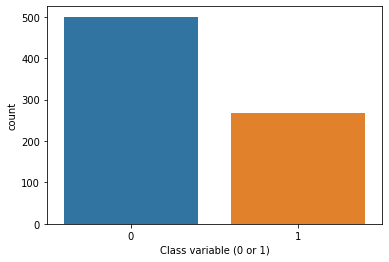

In [10]:
sns.countplot(df["Class variable (0 or 1)"],label="Count")

Class variable (0 or 1)
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

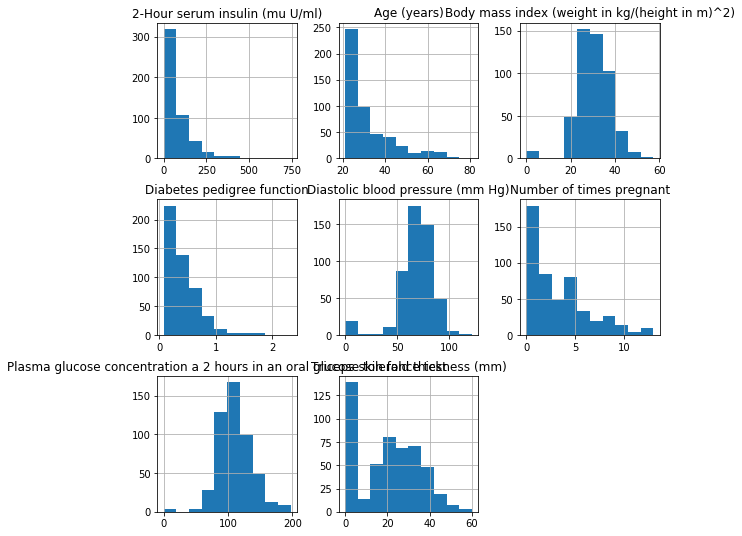

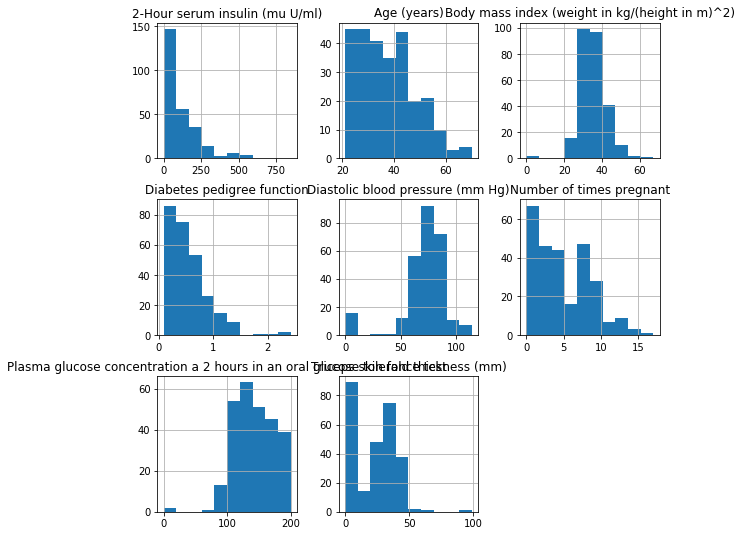

In [11]:
df.groupby("Class variable (0 or 1)").hist(figsize=(9,9))

In [12]:
df.shape

(768, 9)

In [13]:
X=df.iloc[:,0:8]
Y=df.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class variable (0 or 1), dtype: int64

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()

In [15]:
model.fit(X,Y)
print(model.feature_importances_)

[0.10445387 0.2155094  0.10784618 0.0841557  0.07752904 0.13089161
 0.12800092 0.15161328]


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance

Number of times pregnant                                                    0.104454
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0.215509
Diastolic blood pressure (mm Hg)                                            0.107846
Triceps skin fold thickness (mm)                                            0.084156
2-Hour serum insulin (mu U/ml)                                              0.077529
Body mass index (weight in kg/(height in m)^2)                              0.130892
Diabetes pedigree function                                                  0.128001
Age (years)                                                                 0.151613
dtype: float64

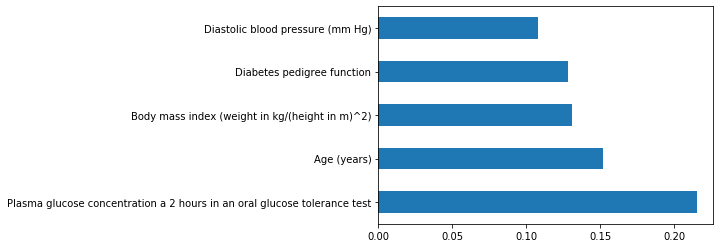

In [17]:
feat_importance.nlargest(5).plot(kind="barh")

In [26]:
X=df.drop(["Number of times pregnant","Triceps skin fold thickness (mm)","2-Hour serum insulin (mu U/ml)",
           "Class variable (0 or 1)"],axis=1)
Y=df["Class variable (0 or 1)"]
X.head()

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
4,137,40,43.1,2.288,33


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=df["Class variable (0 or 1)"],random_state=66)
X_test.head()

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
506,180,90,36.5,0.314,35
709,93,64,38.0,0.674,23
257,114,68,28.7,0.092,25
518,76,60,32.8,0.180,41
432,80,74,30.0,0.527,22


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_test

array([[ 1.69935671e+00,  1.23607139e+00,  5.80570386e-01,
        -4.12979616e-01,  7.93401121e-02],
       [-9.24365862e-01, -3.66231486e-01,  7.92893271e-01,
         7.39987145e-01, -9.77305080e-01],
       [-2.91053516e-01, -1.19723352e-01, -5.23508611e-01,
        -1.12397579e+00, -8.01197548e-01],
       [-1.43704729e+00, -6.12739621e-01,  5.68406054e-02,
        -8.42139466e-01,  6.07662708e-01],
       [-1.31641636e+00,  2.50038850e-01, -3.39495445e-01,
         2.69192384e-01, -1.06535885e+00],
       [ 4.02574291e-01,  2.34535799e+00,  2.32161804e+00,
        -6.91613250e-01,  2.55447644e-01],
       [ 8.85097984e-01,  7.43055119e-01,  1.16091960e+00,
         7.81622056e-01, -9.77305080e-01],
       [-7.73577209e-01, -7.35993688e-01,  2.26698913e-01,
        -4.14681043e-02,  7.83770240e-01],
       [-9.54523593e-01, -4.89485554e-01, -1.13017702e-01,
        -1.00227374e+00, -8.89251314e-01],
       [-3.81526709e-01, -8.59247756e-01, -3.25340586e-01,
         3.65272948e-01

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
predictions

C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [37]:
model.score(X_test,Y_test)

0.765625

In [38]:
model.predict(X_test)[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [40]:
model.predict_proba(X_test)[0:5]

array([[0.26113079, 0.73886921],
       [0.78235096, 0.21764904],
       [0.88489508, 0.11510492],
       [0.90510031, 0.09489969],
       [0.94219501, 0.05780499]])

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       125
           1       0.70      0.57      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192

[[109  16]
 [ 29  38]]


In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [61]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="blue",linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-Curve")
    plt.legend()
    

In [62]:
probs=model.predict_proba(X_test)
probs=probs[:,1]

In [63]:
auc=roc_auc_score(Y_test,probs)
print("AUC:- %.2f" %auc)

AUC:- 0.83


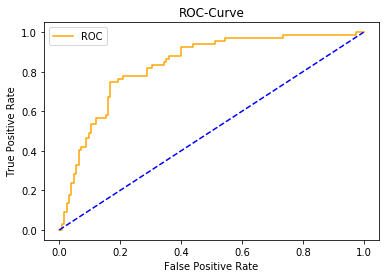

In [64]:
fpr,tpr,thresholds=roc_curve(Y_test,probs)
plot_roc_curve(fpr,tpr)

In [65]:
#Use hotel.csv file and Show how to cluster hotel location data with K-means Clustering. 
#That is performK-means clustering on hotel location data to identify whether the hotels are located in the
#same district.Using k-means cluster location data for 3 clusters. 



In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv("Documents/hotel.csv")
df.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [68]:
df.groupby("district").size()

district
Beitou       18
Xinyi        13
Zhongshan    71
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
address     102 non-null object
lat         102 non-null float64
lon         102 non-null float64
title       102 non-null object
district    102 non-null object
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


In [96]:
df.shape

(102, 5)

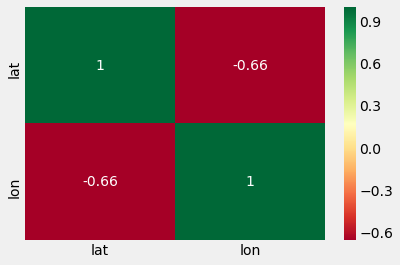

In [97]:
res=df.corr()
imp_features=res.index
sns.heatmap(df[imp_features].corr(),annot=True,cmap="RdYlGn")

[[ 25.137793 121.51495 ]
 [ 25.057854 121.52409 ]
 [ 25.137163 121.50544 ]
 [ 25.039248 121.56741 ]
 [ 25.052057 121.52831 ]]


Text(0, 0.5, 'longitude')

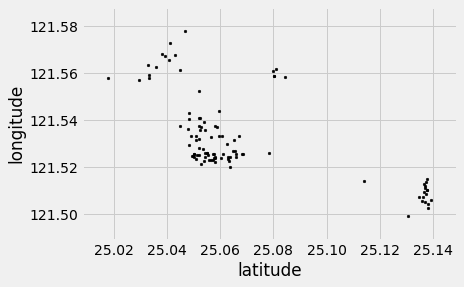

In [98]:
f1=df["lat"].values
f2=df["lon"].values
res=np.array(list(zip(f1,f2)))
print(res[0:5])
plt.scatter(f1,f2,c="black",s=7)
plt.xlabel("latitude")
plt.ylabel("longitude")

In [99]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans=kmeans.fit(res)
labels=kmeans.predict(res)
centroids=kmeans.cluster_centers_

In [100]:
labels

array([1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0])

In [101]:
data=pd.DataFrame({"address":df["address"],
             "latitude":df["lat"],
             "longitude":df["lon"],
             "title":df["title"],
             "district":df["district"],
             "labels":labels})
data.head()

,address,latitude,longitude,title,district,labels
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou,1
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan,0
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,1
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi,2
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan,0


In [102]:
centroids

array([[ 25.05657006, 121.52900055],
       [ 25.13558789, 121.50866228],
       [ 25.04905484, 121.56266768]])

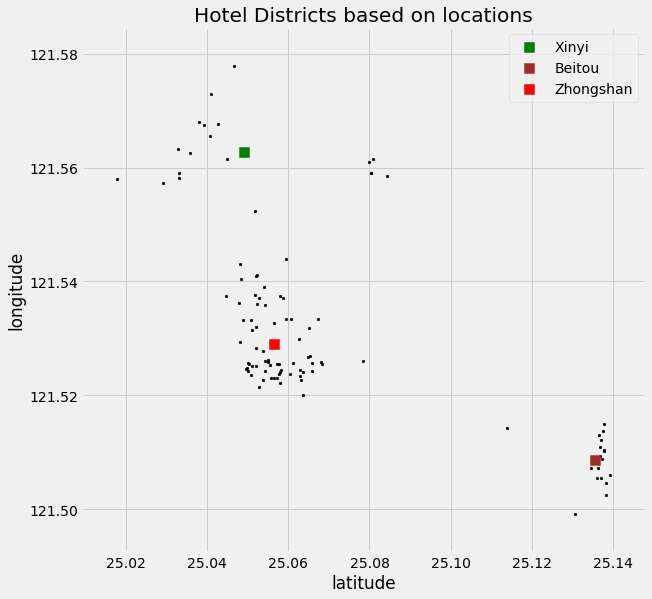

In [103]:
plt.figure(figsize=(9,9))
plt.style.use("fivethirtyeight")
plt.scatter(f1,f2,s=7,c="black")
plt.scatter(25.04905484,121.56266768,s=100,c="g",marker="s",label="Xinyi")
plt.scatter(25.13558789,121.50866228,s=100,c="brown",marker="s",label="Beitou")
plt.scatter(25.05657006,121.52900055,s=100,c="red",marker="s",label="Zhongshan")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Hotel Districts based on locations")
plt.legend()